# Unravelling Mutation Patterns in Extended-Spectrum β-Lactamases for Precision Drug Design Against Antimicrobial Resistance in Enterobacteriaceae

## Data Preparation

In [ ]:
#Repeats Sequences Separated by colon
import pandas as pd

# Load the CSV file
file_path = "1.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Group by 'Accession' and join 'Sequence' with a colon
result = df.groupby('Sequence Name')['Sequence'].apply(lambda x: ':'.join(x)).reset_index()

# Save the result to a new CSV file
output_file = "Repeat_Sequence.csv"  # Replace with your desired output file name
result.to_csv(output_file, index=False)

print(f"Processed data saved to {output_file}")

In [ ]:
# Repeat Units separated by colon
import pandas as pd

# Load the CSV file
file_path = "1.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Group by 'Accession' and join 'Sequence' with a colon
result = df.groupby('Sequence Name')['Repeat Unit'].apply(lambda x: ':'.join(x)).reset_index()

# Save the result to a new CSV file
output_file = "Repeat_Unit.csv"  # Replace with your desired output file name
result.to_csv(output_file, index=False)

print(f"Processed data saved to {output_file}")

In [ ]:
#Sum of Repeat Scores
import pandas as pd

# Load the CSV file
file_path = "1.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Ensure the Score column is numeric (remove ' pt' and convert to integers)
df['Score'] = df['Score'].str.replace(' pt', '').astype(int)

# Group by Sequence Name and sum the Score column
result = df.groupby('Sequence Name')['Score'].sum().reset_index()

# Save the result to a new CSV file
output_file = "summed_scores.csv"  # Replace with your desired output file name
result.to_csv(output_file, index=False)

print(f"Processed data saved to {output_file}")

In [ ]:
#Transcription Factors
import pandas as pd

# Load the CSV file
file_path = "1.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Group by 'Accession' and join 'Sequence' with a colon
result = df.groupby('Sequence Name')['Sequence'].apply(lambda x: ':'.join(x)).reset_index()

# Save the result to a new CSV file
output_file = "TF_Seqence.csv"  # Replace with your desired output file name
result.to_csv(output_file, index=False)

print(f"Processed data saved to {output_file}")

## Computing various Annotations and Align the data using Clustal W

In [1]:
import pandas as pd
import os

# List of CSV files to check
file_list = ["0_CTX-M.csv", "0_SHV.csv", "0_TEM.csv"]  # Replace with your actual file names

# Loop through files and display their headers
for file in file_list:
    if os.path.exists(file):  # Check if the file exists
        print(f"\nHeaders of {file}:")
        data = pd.read_csv(file)
        print(data.columns.tolist())  # Display the headers as a list
    else:
        print(f"\nFile {file} not found!")


Headers of 0_CTX-M.csv:
['Label', 'Accession', 'Direction', 'Gene Sequence', 'Allele', 'Protein', 'Gene Names', 'Product', 'locus_tag', 'Repeat Sequence', 'Repeat Unit', 'Sum_Repeats_Scores', 'Organism', 'Strain', 'TF_Sequence']

Headers of 0_SHV.csv:
['Label', 'Accession', 'Direction', 'Gene Sequence', 'Allele', 'Protein', 'Gene Names', 'Product', 'locus_tag', 'Repeat Sequence', 'Repeat Unit', 'Sum_Repeats_Scores', 'Organism', 'Strain', 'TF_Sequence']

Headers of 0_TEM.csv:
['Label', 'Accession', 'Direction', 'Gene Sequence', 'Allele', 'Protein', 'Gene Names', 'Product', 'locus_tag', 'Repeat Sequence', 'Repeat Unit', 'Sum_Repeats_Scores', 'Organism', 'Strain', 'TF_Sequence']


In [2]:
#pip install biopython
#pip install seaborn

Note: you may need to restart the kernel to use updated packages.


#### CTX-M

In [4]:
from Bio.SeqUtils import molecular_weight
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
import pandas as pd
import numpy as np
import subprocess
import os
from collections import Counter
from scipy.stats import entropy
from Bio import AlignIO
from itertools import combinations
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('0_CTX-M.csv')
print(f"Data loaded successfully. Number of sequences: {len(data)}")

# Sample reference data (for SNP and mutation comparisons)
reference_sequence = "ATGAT---------GACTCAGAGCATTCGCCGCTCAATGTTAACGGTGATGGCGACGCTACCCCTGCTATTTAGCAGCGCAACGCTGCATGCGCAGGCGAACAGCGTGCAACAGCAGCTGGAAGCCCTGGAGAAAAGTTCGGGAGGTCGGCTTGGCGTTGCGCTGATTAACACCGCCGATAATTCGCAGATTCTCTACCGTGCCGATGAACGTTTTGCGATGTGCAGTACCAGTAAGGTGATGGCGGCCGCGGCGGTGCTTAAACAGAGCGAGAGCGATAAGCACCTGCTAAATCAGCGCGTTGAAATCAAGAAGAGCGACCTGGTTAACTACAATCCCATTGCGGAGAAACACGTTAACGGCACGATGACGCTGGCTGAGCTTGGCGCAGCGGCGCTGCAGTATAGCGACAATACTGCCATGAATAAGCTGATTGCCCATCTGGGTGGTCCCGATAAAGTGACGGCGTTTGCTCGCTCGTTGGGTGATGAGACCTTCCGTCTGGACAGAACCGAGCCCACGCTCAATACCGCCATTCCAGGCGACCCGCGTGATACCACCACGCCGCTCGCGATGGCGCAGACCCTGAAAAATCTGACGCTGGGTAAAGCGCTGGCGGAAACTCAGCGGGCACAGTTGGTGACGTGGCTTAAGGGCAATACTACCGGTAGCGCGAGCATTCGGGCGGGTCTGCCGAAATCATGGGTAGTGGGCGATAAAACCGGCAGCGGAGATTATGGCACCACCAACGATATCGCGGTTATCTGGCCGGAAAACCACGCACCGCTGGTTCTGGTGACCTACTTTACCCAACCGGAGCAGAAGGCGGAAAGGCGTCGGGATATTCTGGCTGCGGCGGCGAAAATCGTAACCCACGGTTTCTGA"

# BLOSUM62 Substitution Matrix (simplified example)
blosum62 = {
    ('A', 'A'): 4, ('A', 'R'): -1, ('A', 'N'): -2, ('A', 'D'): -2, 
    ('A', 'C'): 0, ('A', 'Q'): -1, ('A', 'E'): -1, ('A', 'G'): 0, 
    ('A', 'H'): -1, ('A', 'I'): -1, ('A', 'L'): -1, ('A', 'K'): -1, 
    ('A', 'M'): -1, ('A', 'F'): -2, ('A', 'P'): -1, ('A', 'S'): 1, 
    ('A', 'T'): 0, ('A', 'W'): -3, ('A', 'Y'): -2, ('A', 'V'): 0,
}

# Function definitions for all required computations
def compute_gc_content(seq):
    return (seq.count("G") + seq.count("C")) / len(seq) * 100

def find_snp_positions(seq, reference):
    return [i for i, (a, b) in enumerate(zip(seq, reference)) if a != b]

def find_indels(seq, reference):
    return [i for i, (a, b) in enumerate(zip(seq, reference)) if a == '-' or b == '-']

def codon_usage(seq):
    return {seq[i:i+3]: seq.count(seq[i:i+3]) for i in range(0, len(seq) - 2, 3)}

def predict_tfbs(seq):
    return ["TFBS1", "TFBS2"]

def categorize_mutations(seq, reference):
    return [("synonymous" if a == b else "nonsynonymous") for a, b in zip(seq, reference)]

def compute_amino_acid_composition(protein_seq):
    analyzed_seq = ProteinAnalysis(protein_seq)
    return analyzed_seq.get_amino_acids_percent()

def predict_protein_stability(protein_seq):
    return "stable"

def compute_conservation(seq):
    return "high conservation"

def hydrophobicity(protein_seq):
    analyzed_seq = ProteinAnalysis(protein_seq)
    return analyzed_seq.gravy()

def secondary_structure(protein_seq):
    return "alpha-helix"

def compute_isoelectric_point(protein_seq):
    analyzed_seq = ProteinAnalysis(protein_seq)
    return analyzed_seq.isoelectric_point()

def compute_aromaticity(protein_seq):
    analyzed_seq = ProteinAnalysis(protein_seq)
    return analyzed_seq.aromaticity()

def compute_aliphatic_index(protein_seq):
    """
    Calculate the aliphatic index of a protein sequence.
    """
    analyzed_seq = ProteinAnalysis(protein_seq)
    amino_acid_content = analyzed_seq.get_amino_acids_percent()
    ala = amino_acid_content.get("A", 0)
    val = amino_acid_content.get("V", 0)
    ile = amino_acid_content.get("I", 0)
    leu = amino_acid_content.get("L", 0)
    aliphatic_index = 100 * (ala + 2.9 * val + 3.9 * (ile + leu))
    return aliphatic_index
    
def compute_flexibility(protein_seq):
    analyzed_seq = ProteinAnalysis(protein_seq)
    return np.mean(analyzed_seq.flexibility())
    
def mutational_hotspots(seq):
    return [i for i in range(len(seq)) if seq[i] in "AGCT"]

def nucleotide_mutation_frequency(seq, reference):
    freqs = {}
    for a, b in zip(seq, reference):
        if a != b:
            mutation = f"{a}>{b}"
            if mutation not in freqs:
                freqs[mutation] = 0
            freqs[mutation] += 1
    return freqs

def compute_functional_impact(alignment, blosum62):
    alignment_length = alignment.get_alignment_length()
    positional_entropy_values = []  
    functional_impact_scores = []   

    for j in range(alignment_length):
        column = alignment[:, j]
        counts = Counter(column)
        frequencies = np.array(list(counts.values())) / sum(counts.values())
        pos_entropy = entropy(frequencies)
        positional_entropy_values.append(pos_entropy)

    for sequence in alignment:
        impact_score = 0
        for j in range(alignment_length):
            column = alignment[:, j]
            counts = Counter(column)
            for (aa1, freq1), (aa2, freq2) in combinations(counts.items(), 2):
                blosum_score = blosum62.get((aa1, aa2), blosum62.get((aa2, aa1), 0))
                impact_score += blosum_score * freq1 * freq2
        functional_impact_scores.append(impact_score / alignment_length)

    return positional_entropy_values, functional_impact_scores

def align_sequences(sequences, clustalw_path="/usr/bin/clustalw"):
    with open("0_CTX-M_temp_sequences.fasta", "w") as f:
        for i, seq in enumerate(sequences):
            f.write(f">seq{i}\n{seq}\n")
    if not os.path.exists(clustalw_path):
        print("Error: ClustalW executable not found at specified path.")
        return None
    try:
        subprocess.run([clustalw_path, "0_CTX-M_temp_sequences.fasta"], check=True)
        alignment = AlignIO.read("0_CTX-M_temp_sequences.aln", "clustal")
        return alignment
    except subprocess.CalledProcessError:
        print("Error: ClustalW alignment failed.")
        return None

# Extract gene sequences and perform alignment
gene_sequences = data["Gene Sequence"].tolist()
aligned_sequences = align_sequences(gene_sequences)

if aligned_sequences is None:
    print("Alignment failed. Exiting program.")
    exit()

# Compute Functional Impact and Positional Entropy
positional_entropy_values, functional_impact_scores = compute_functional_impact(aligned_sequences, blosum62)

# Initialize annotations dictionary
annotations = {
    "GC_Content": [], "SNP_Positions": [], "InDel_Variants": [], "Codon_Usage": [], "TFBS": [],
    "Mutation_Types": [], "Amino_Acid_Composition": [], "Protein_Stability": [], "Functional_Impact": [],
    "Conservation": [], "Hydrophobicity": [], "Secondary_Structure": [], "Isoelectric_Point": [],
    "Mutational_Hotspots": [], "Nucleotide_Mutation_Frequency": [], "Aromaticity": [], "Aliphatic_Index": [], "Flexibility": []
}

# Compute all annotations and add them to the dictionary
for idx, row in data.iterrows():
    sequence = row["Gene Sequence"]
    protein_sequence = row["Protein"]
    
    analyzed_seq = ProteinAnalysis(protein_sequence)  # Create an instance for the current protein sequence

    annotations["GC_Content"].append(compute_gc_content(sequence))
    annotations["SNP_Positions"].append(find_snp_positions(sequence, reference_sequence))
    annotations["InDel_Variants"].append(find_indels(sequence, reference_sequence))
    annotations["Codon_Usage"].append(codon_usage(sequence))
    annotations["TFBS"].append(predict_tfbs(sequence))
    annotations["Mutation_Types"].append(categorize_mutations(sequence, reference_sequence))
    annotations["Amino_Acid_Composition"].append(compute_amino_acid_composition(protein_sequence))
    annotations["Protein_Stability"].append(predict_protein_stability(protein_sequence))
    annotations["Functional_Impact"].append(functional_impact_scores[idx])
    annotations["Conservation"].append(compute_conservation(sequence))
    annotations["Hydrophobicity"].append(hydrophobicity(protein_sequence))
    annotations["Secondary_Structure"].append(secondary_structure(protein_sequence))
    annotations["Isoelectric_Point"].append(compute_isoelectric_point(protein_sequence))
    annotations["Mutational_Hotspots"].append(mutational_hotspots(sequence))
    annotations["Nucleotide_Mutation_Frequency"].append(nucleotide_mutation_frequency(sequence, reference_sequence))
    annotations["Aromaticity"].append(analyzed_seq.aromaticity())
    annotations["Aliphatic_Index"].append(compute_aliphatic_index(protein_sequence))
    annotations["Flexibility"].append(np.mean(analyzed_seq.flexibility()))


# Convert annotations to DataFrame and save
annotations_df = pd.DataFrame(annotations)
annotated_data = pd.concat([data, annotations_df], axis=1)
annotated_data.to_csv("0_CTX-M_Annotations.csv", index=False)

output_filename = "0_CTX-M_Annotations.csv"
annotated_data.to_csv(output_filename, index=False)

# Print statement to confirm annotations
annotations_list = ", ".join(annotations.keys())

print(f"Now we have added the following annotations to {output_filename}:\n\n{annotations_list}")

print("TASK COMPLETED AND FILES WERE SAVED \n \n ")

Data loaded successfully. Number of sequences: 180



 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: seq0         885 bp
Sequence 2: seq1         885 bp
Sequence 3: seq2         885 bp
Sequence 4: seq3         885 bp
Sequence 5: seq4         885 bp
Sequence 6: seq5         885 bp
Sequence 7: seq6         885 bp
Sequence 8: seq7         885 bp
Sequence 9: seq8         885 bp
Sequence 10: seq9         885 bp
Sequence 11: seq10        885 bp
Sequence 12: seq11        885 bp
Sequence 13: seq12        885 bp
Sequence 14: seq13        885 bp
Sequence 15: seq14        885 bp
Sequence 16: seq15        885 bp
Sequence 17: seq16        885 bp
Sequence 18: seq17        885 bp
Sequence 19: seq18        885 bp
Sequence 20: seq19        885 bp
Sequence 21: seq20        885 bp
Sequence 22: seq21        885 bp
Sequence 23: seq22        885 bp
Sequence 24: seq23        885 bp
Sequence 25: seq24        885 bp
Sequence 26: seq25        885 bp
Sequence 27: seq26        

Nucleotide Mutation Counts: {'A': 37617, 'T': 30092, 'G': 48282, 'C': 41685}


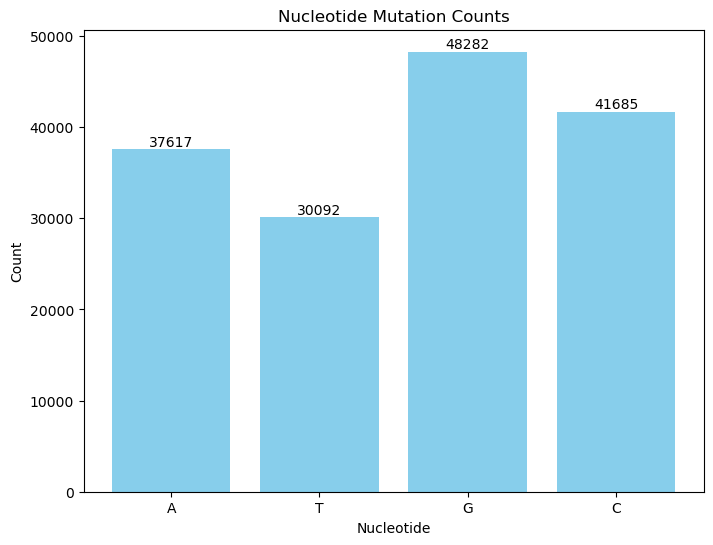

Amino Acid Mutation Counts: {'M': 1439, 'K': 2545, 'S': 3187, 'L': 5700, 'R': 2946, 'Q': 2937, 'F': 908, 'T': 5017, 'A': 6958, 'V': 3215, 'G': 3782, 'P': 2434, 'Y': 1072, 'D': 2575, 'E': 1996, 'I': 2074, 'N': 2206, 'C': 258, 'H': 411, 'W': 539, '*': 180}


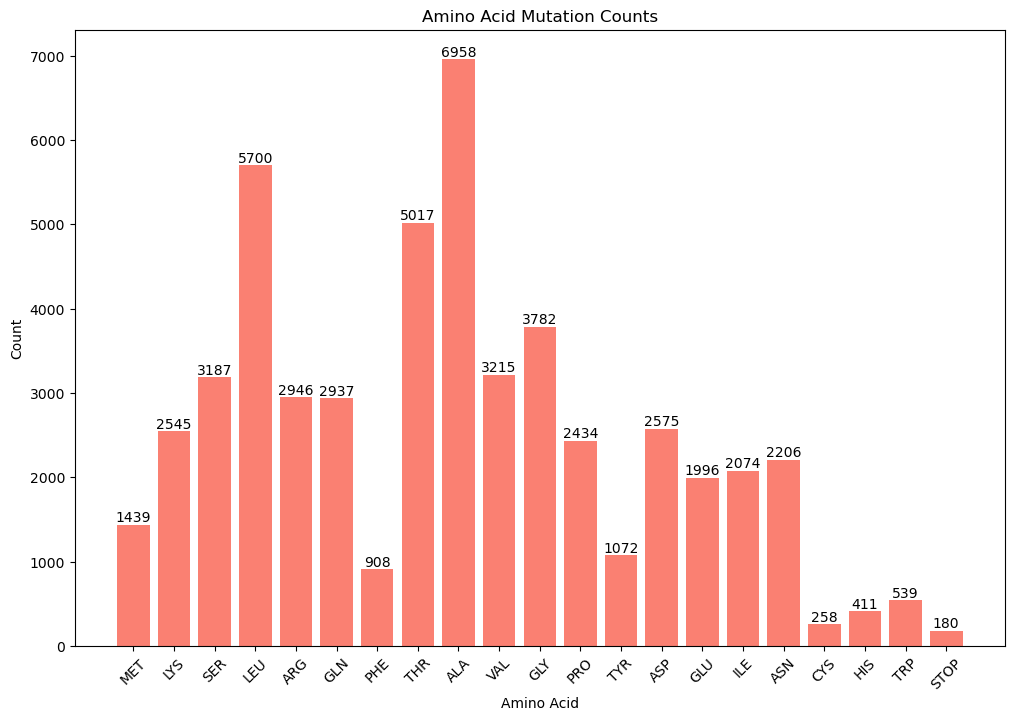

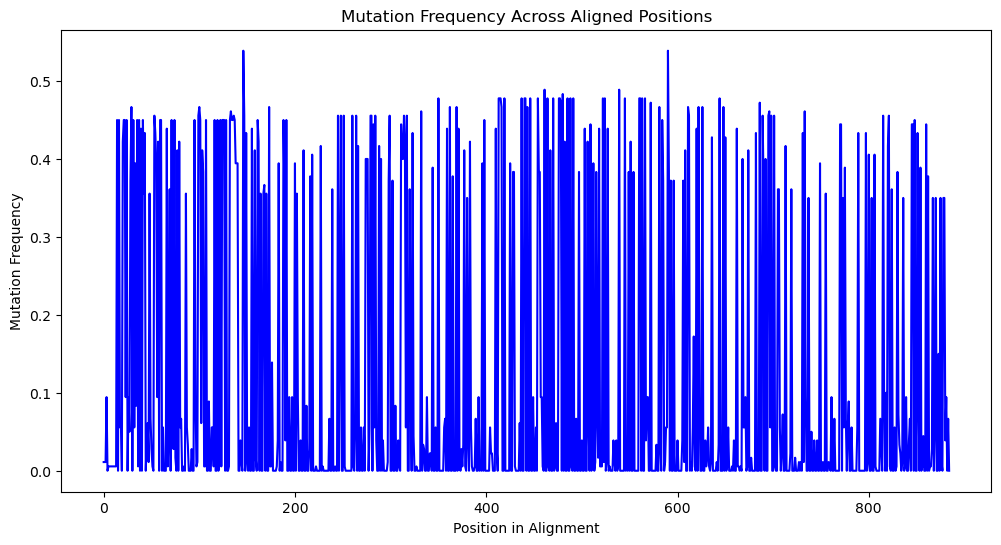

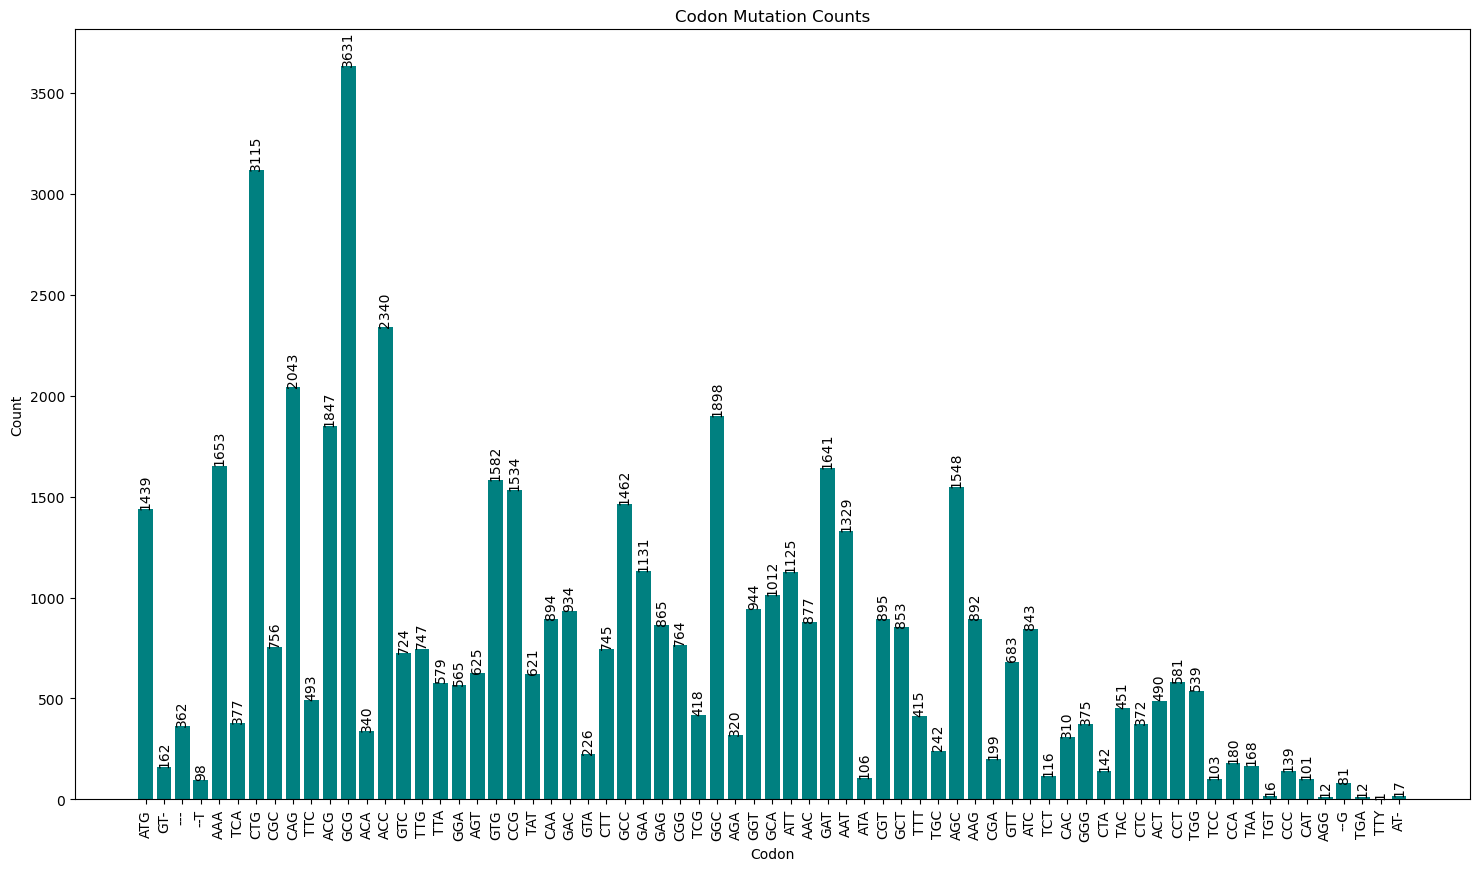

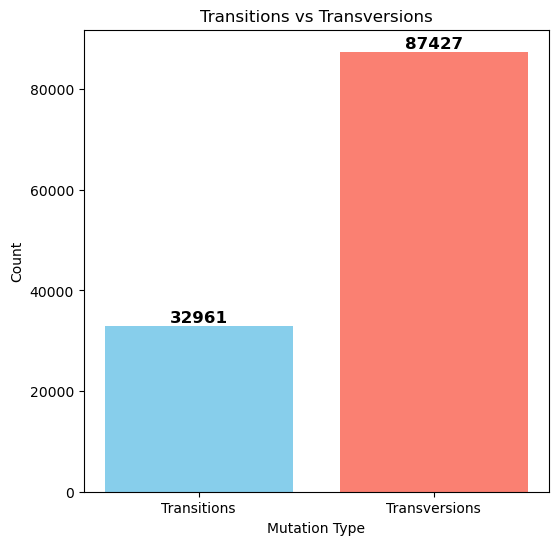

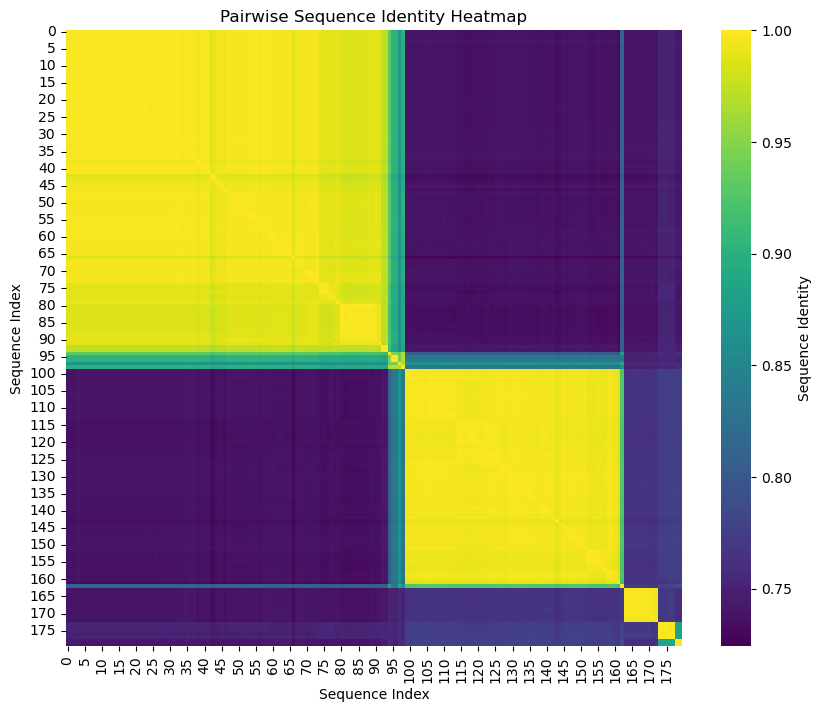

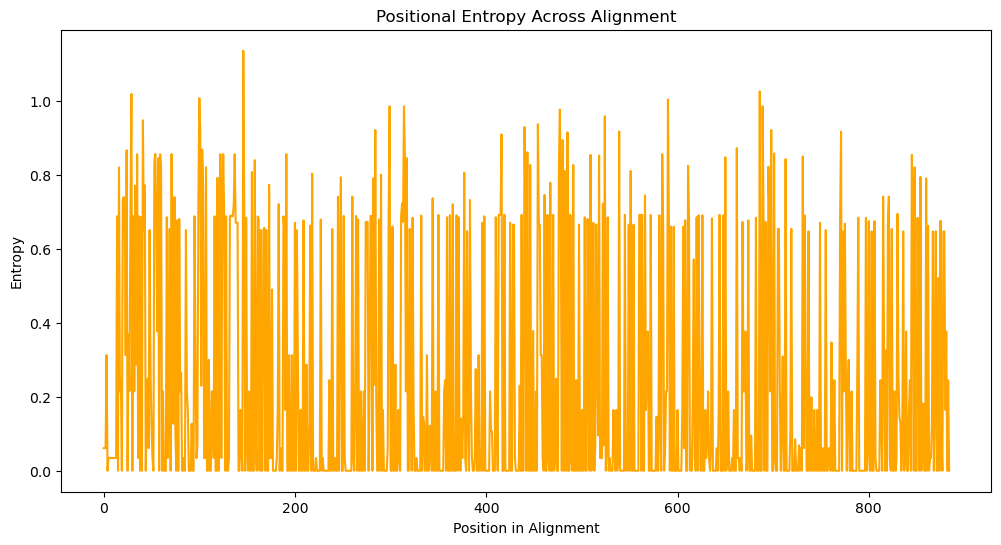

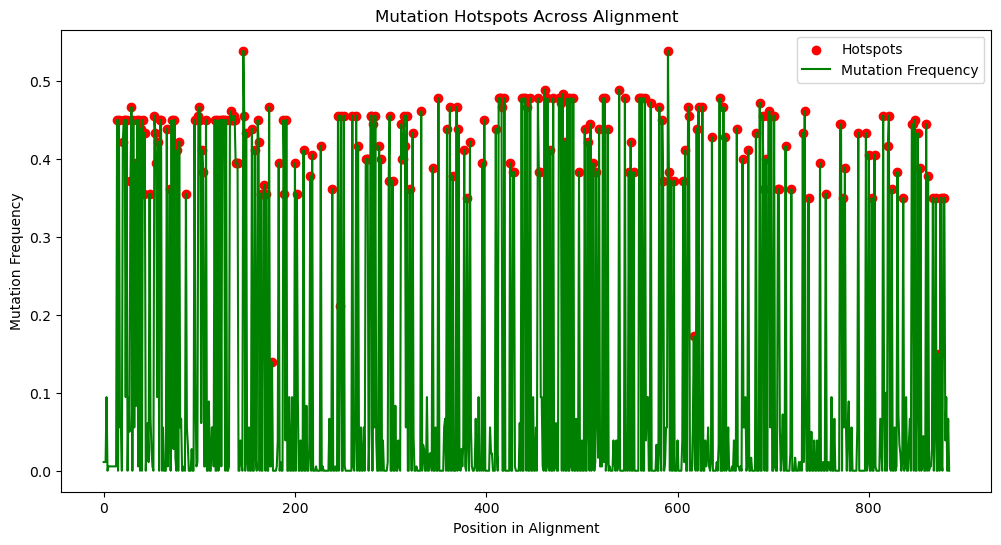

Mutation Analysis Summary:
Total Sequences Aligned: 180
Total Alignment Length: 885
Nucleotide Mutation Counts: {'A': 37617, 'T': 30092, 'G': 48282, 'C': 41685}
Amino Acid Mutation Counts: {'MET': 1439, 'LYS': 2545, 'SER': 3187, 'LEU': 5700, 'ARG': 2946, 'GLN': 2937, 'PHE': 908, 'THR': 5017, 'ALA': 6958, 'VAL': 3215, 'GLY': 3782, 'PRO': 2434, 'TYR': 1072, 'ASP': 2575, 'GLU': 1996, 'ILE': 2074, 'ASN': 2206, 'CYS': 258, 'HIS': 411, 'TRP': 539, 'STOP': 180}
Transitions: 32961
Transversions: 87427
Average Pairwise Identity: 0.850112227104694
Mean Positional Entropy: 0.23387059749909375
Mutation Hotspots: [14, 16, 20, 21, 22, 24, 28, 29, 31, 33, 35, 37, 39, 41, 42, 43, 48, 53, 54, 55, 57, 59, 60, 66, 69, 71, 74, 77, 79, 86, 95, 99, 100, 101, 103, 104, 107, 116, 119, 122, 124, 125, 126, 128, 132, 133, 134, 135, 136, 137, 138, 139, 140, 146, 147, 149, 155, 158, 161, 162, 164, 167, 168, 170, 173, 176, 183, 188, 189, 191, 200, 202, 209, 216, 218, 227, 239, 245, 247, 248, 251, 260, 264, 266, 274

In [5]:
# Step 2.1: Analyze nucleotide mutations
def nucleotide_mutation_analysis(alignment):
    nucleotides = ['A', 'T', 'G', 'C']
    mutation_counts = {nuc: 0 for nuc in nucleotides}
    
    for record in alignment:
        seq = str(record.seq)
        for nucleotide in seq:
            if nucleotide in nucleotides:
                mutation_counts[nucleotide] += 1

    return mutation_counts

mutation_counts = nucleotide_mutation_analysis(aligned_sequences)
print("Nucleotide Mutation Counts:", mutation_counts)

# Step 2.1.1: Plot Nucleotide Mutation Counts
def plot_nucleotide_mutation_counts(mutation_counts):
    plt.figure(figsize=(8, 6))
    bars = plt.bar(mutation_counts.keys(), mutation_counts.values(), color='skyblue')
    plt.xlabel("Nucleotide")
    plt.ylabel("Count")
    plt.title("Nucleotide Mutation Counts")

    # Adding count labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

    plt.savefig("1_CTX-M_nucleotide_mutation_counts.svg", format="svg")
    plt.show()

plot_nucleotide_mutation_counts(mutation_counts)

# Step 2.2: Amino Acid Mutation Analysis
def codon_to_amino_acid(codon):
    genetic_code = {
        'ATA': 'I', 'ATC': 'I', 'ATT': 'I', 'ATG': 'M',
        'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
        'AAC': 'N', 'AAT': 'N', 'AAA': 'K', 'AAG': 'K',
        'AGC': 'S', 'AGT': 'S', 'AGA': 'R', 'AGG': 'R',
        'CTA': 'L', 'CTC': 'L', 'CTG': 'L', 'CTT': 'L',
        'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
        'CAC': 'H', 'CAT': 'H', 'CAA': 'Q', 'CAG': 'Q',
        'CGA': 'R', 'CGC': 'R', 'CGG': 'R', 'CGT': 'R',
        'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
        'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
        'GAC': 'D', 'GAT': 'D', 'GAA': 'E', 'GAG': 'E',
        'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G',
        'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
        'TTC': 'F', 'TTT': 'F', 'TTA': 'L', 'TTG': 'L',
        'TAC': 'Y', 'TAT': 'Y', 'TAA': '*', 'TAG': '*',
        'TGC': 'C', 'TGT': 'C', 'TGA': '*', 'TGG': 'W'
    }
    return genetic_code.get(codon, None)

def amino_acid_mutation_analysis(alignment):
    aa_counts = {}
    
    for record in alignment:
        seq = str(record.seq)
        for i in range(0, len(seq), 3):
            codon = seq[i:i+3]
            if len(codon) == 3:
                aa = codon_to_amino_acid(codon)
                if aa:
                    aa_counts[aa] = aa_counts.get(aa, 0) + 1

    return aa_counts

aa_counts = amino_acid_mutation_analysis(aligned_sequences)
print("Amino Acid Mutation Counts:", aa_counts)

# Convert single-letter amino acids to full names
aa_full_names = {
    'A': 'ALA', 'R': 'ARG', 'N': 'ASN', 'D': 'ASP', 'C': 'CYS', 'Q': 'GLN', 'E': 'GLU', 
    'G': 'GLY', 'H': 'HIS', 'I': 'ILE', 'L': 'LEU', 'K': 'LYS', 'M': 'MET', 'F': 'PHE', 
    'P': 'PRO', 'S': 'SER', 'T': 'THR', 'W': 'TRP', 'Y': 'TYR', 'V': 'VAL', '*': 'STOP'
}

# Update amino acid counts with full names
aa_counts_full_names = {aa_full_names.get(k, k): v for k, v in aa_counts.items()}

# Step 2.2.1: Plot Amino Acid Mutation Counts
def plot_amino_acid_mutation_counts(aa_counts_full_names):
    plt.figure(figsize=(12, 8))
    bars = plt.bar(aa_counts_full_names.keys(), aa_counts_full_names.values(), color='salmon')
    plt.xlabel("Amino Acid")
    plt.ylabel("Count")
    plt.title("Amino Acid Mutation Counts")
    plt.xticks(rotation=45)

    # Adding count labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

    plt.savefig("2_CTX-M_amino_acid_mutation_counts.svg", format="svg")
    plt.show()

plot_amino_acid_mutation_counts(aa_counts_full_names)

# Step 2.3: Mutation Frequency Analysis Across Aligned Positions
def compute_mutation_frequencies(alignment):
    num_sequences = len(alignment)
    alignment_length = alignment.get_alignment_length()
    mutation_frequencies = []

    for i in range(alignment_length):
        column = alignment[:, i]
        most_common = max(set(column), key=column.count)
        num_mutations = sum(1 for x in column if x != most_common)
        mutation_frequency = num_mutations / num_sequences
        mutation_frequencies.append(mutation_frequency)

    return mutation_frequencies

mutation_frequencies = compute_mutation_frequencies(aligned_sequences)

# Plot mutation frequency across positions
plt.figure(figsize=(12, 6))
plt.plot(mutation_frequencies, color='blue', linewidth=1.5)
plt.xlabel("Position in Alignment")
plt.ylabel("Mutation Frequency")
plt.title("Mutation Frequency Across Aligned Positions")
plt.savefig("3_CTX-M_mutation_frequency_across_positions.svg", format="svg")
plt.show()

# Step 2.4: Codon Mutation Pattern Analysis
def codon_mutation_analysis(alignment):
    codon_changes = Counter()
    for record in alignment:
        seq = str(record.seq)
        for i in range(0, len(seq) - 2, 3):
            codon = seq[i:i + 3]
            if len(codon) == 3:
                codon_changes[codon] += 1
    return codon_changes

codon_changes = codon_mutation_analysis(aligned_sequences)

# Plot the codon mutation counts
plt.figure(figsize=(18, 10))
bars = plt.bar(codon_changes.keys(), codon_changes.values(), color='teal')
plt.xlabel("Codon")
plt.ylabel("Count")
plt.title("Codon Mutation Counts")
plt.xticks(rotation=90)

# Adding count labels on top of bars, rotated vertically
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', rotation=90)

plt.savefig("4_CTX-M_codon_mutation_counts.svg", format="svg")
plt.show()


# Step 2.5: Transition and Transversion Analysis
def transition_transversion_analysis(alignment):
    transitions = 0
    transversions = 0
    purines = {'A', 'G'}
    pyrimidines = {'C', 'T'}
    
    for record in alignment:
        seq = str(record.seq)
        for i in range(1, len(seq)):
            if seq[i] != seq[i - 1]:
                if (seq[i - 1] in purines and seq[i] in purines) or (seq[i - 1] in pyrimidines and seq[i] in pyrimidines):
                    transitions += 1
                else:
                    transversions += 1

    return transitions, transversions

transitions, transversions = transition_transversion_analysis(aligned_sequences)

# Plot transitions vs. transversions
labels = ['Transitions', 'Transversions']
counts = [transitions, transversions]

plt.figure(figsize=(6, 6))
bars = plt.bar(labels, counts, color=['skyblue', 'salmon'])

# Add count labels on top of bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count), 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Mutation Type")
plt.ylabel("Count")
plt.title("Transitions vs Transversions")
plt.savefig("5_CTX-M_transitions_vs_transversions.svg", format="svg")
plt.show()


# Step 2.6: Pairwise Sequence Identity Heatmap
def compute_pairwise_identity(alignment):
    num_sequences = len(alignment)
    identity_matrix = np.zeros((num_sequences, num_sequences))

    for i in range(num_sequences):
        for j in range(i, num_sequences):
            identity = sum(1 for a, b in zip(alignment[i].seq, alignment[j].seq) if a == b)
            identity_matrix[i][j] = identity / len(alignment[i].seq)
            identity_matrix[j][i] = identity_matrix[i][j]

    return identity_matrix

identity_matrix = compute_pairwise_identity(aligned_sequences)

# Plot heatmap of pairwise sequence identity
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(identity_matrix, cmap="viridis", square=True, cbar_kws={"label": "Sequence Identity"})
plt.xlabel("Sequence Index")
plt.ylabel("Sequence Index")
plt.title("Pairwise Sequence Identity Heatmap")
plt.savefig("6_CTX-M_pairwise_sequence_identity_heatmap.svg", format="svg")
plt.show()

# Step 2.7: Entropy Analysis for Positional Variability
def positional_entropy(alignment):
    alignment_length = alignment.get_alignment_length()
    positional_entropy_values = []

    for i in range(alignment_length):
        column = alignment[:, i]
        counts = Counter(column)
        frequencies = np.array(list(counts.values())) / sum(counts.values())
        positional_entropy_values.append(entropy(frequencies))

    return positional_entropy_values

entropy_values = positional_entropy(aligned_sequences)

# Plot positional entropy
plt.figure(figsize=(12, 6))
plt.plot(entropy_values, color='orange', linewidth=1.5)
plt.xlabel("Position in Alignment")
plt.ylabel("Entropy")
plt.title("Positional Entropy Across Alignment")
plt.savefig("7_CTX-M_positional_entropy_across_alignment.svg", format="svg")
plt.show()

# Step 2.8: NEW - Mutation Hotspots Visualization
def identify_mutation_hotspots(mutation_frequencies, threshold=0.1):
    return [i for i, freq in enumerate(mutation_frequencies) if freq > threshold]

mutation_hotspots = identify_mutation_hotspots(mutation_frequencies)

# Plot mutation hotspots
plt.figure(figsize=(12, 6))
plt.scatter(mutation_hotspots, [mutation_frequencies[i] for i in mutation_hotspots], color='red', label='Hotspots')
plt.plot(mutation_frequencies, color='green', linewidth=1.5, label='Mutation Frequency')
plt.xlabel("Position in Alignment")
plt.ylabel("Mutation Frequency")
plt.title("Mutation Hotspots Across Alignment")
plt.legend()
plt.savefig("8_CTX-M_mutation_hotspots.svg", format="svg")
plt.show()

# Step 2.10: Summary of Results and Mutation Insights
print("Mutation Analysis Summary:")
print("Total Sequences Aligned:", len(aligned_sequences))
print("Total Alignment Length:", aligned_sequences.get_alignment_length())
print("Nucleotide Mutation Counts:", mutation_counts)
print("Amino Acid Mutation Counts:", aa_counts_full_names)
print("Transitions:", transitions)
print("Transversions:", transversions)
print("Average Pairwise Identity:", np.mean(identity_matrix))
print("Mean Positional Entropy:", np.mean(entropy_values))
print("Mutation Hotspots:", mutation_hotspots)

print("Task Completed")

#### SHV

In [1]:
from Bio.SeqUtils import molecular_weight
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
import pandas as pd
import numpy as np
import subprocess
import os
from collections import Counter
from scipy.stats import entropy
from Bio import AlignIO
from itertools import combinations
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('0_SHV.csv')
print(f"Data loaded successfully. Number of sequences: {len(data)}")

# Sample reference data (for SNP and mutation comparisons)
reference_sequence = "ATGCGTTATATTCGCCTGTGTATTATCTCCCTGTTAGCCACCCTGCCGCTGGCGGTACACGCCAGCCCGCAGCCGCTTGAGCAAATTAAACT---------------------------------------AAGCGAAAGCCAGCTGTCGGGCCGCGTAGGCATGATAGAAATGGATCCGGCCAGCGGCCGCACGCTGACCGCCTGGCGCGCCGATGAACGCTTTCCCATGATGAGCACCTTTAAAGTAGTGCTCTGCGGCGCAGTGCTGGCGCGGGTGGATGCCGGTGACGAACAGCTGGAGCGAAAGATCCACTATCGCCAGCAGGATCTGGTGGACTACTCGCCGGTCAGCGAAAAACACCTTGCCGACGGTATGACGGTCGGCGAACTCTGCGCCGCCGCCATTACCATGAGCGATAACAGCGCCGCCAATCTGCTGCTGGCCACCTTCGGCGGCCCCGCAGGATTGACTGCCTTTTTGCGCCAGATCGGCGACAACGTCACCCGCCTTGACCGCT---------------GGGAAACGG------AACTGAATGAGGCGCTTCCCGGCGACGCCCGCGACACCACTACCCCGGCCAGCATGGCCGCGACCCTGCGCAAGCTGCTGACCAGCCAGCGTCTGAGCGCCCGTTCGCAACGGCAGCTGCTGCAGTGGATGGTGGACGATCGGGTCGCCGGACCGTTGATCCGCTCCGTGCTGCCGGCGGGCTGGTTTATCGCCGATAAGACCGGAGCTGGCGAGCGGGGTGCGCGCGGCATTGTCGCCCTGCTTGGCCCGAATAACAAAGCAGAGCGCATTGTGGTGATTTATCTGCGGGATACGCCGGCGAGCATGGCCGAGCGAAATCAGCAAATCGCCGGGATCGGCGCGGCGCTGATCGAACACTGGCAACGCTAA"

# BLOSUM62 Substitution Matrix (simplified example)
blosum62 = {
    ('A', 'A'): 4, ('A', 'R'): -1, ('A', 'N'): -2, ('A', 'D'): -2, 
    ('A', 'C'): 0, ('A', 'Q'): -1, ('A', 'E'): -1, ('A', 'G'): 0, 
    ('A', 'H'): -1, ('A', 'I'): -1, ('A', 'L'): -1, ('A', 'K'): -1, 
    ('A', 'M'): -1, ('A', 'F'): -2, ('A', 'P'): -1, ('A', 'S'): 1, 
    ('A', 'T'): 0, ('A', 'W'): -3, ('A', 'Y'): -2, ('A', 'V'): 0,
}

# Function definitions for all required computations
def compute_gc_content(seq):
    return (seq.count("G") + seq.count("C")) / len(seq) * 100

def find_snp_positions(seq, reference):
    return [i for i, (a, b) in enumerate(zip(seq, reference)) if a != b]

def find_indels(seq, reference):
    return [i for i, (a, b) in enumerate(zip(seq, reference)) if a == '-' or b == '-']

def codon_usage(seq):
    return {seq[i:i+3]: seq.count(seq[i:i+3]) for i in range(0, len(seq) - 2, 3)}

def predict_tfbs(seq):
    return ["TFBS1", "TFBS2"]

def categorize_mutations(seq, reference):
    return [("synonymous" if a == b else "nonsynonymous") for a, b in zip(seq, reference)]

def compute_amino_acid_composition(protein_seq):
    analyzed_seq = ProteinAnalysis(protein_seq)
    return analyzed_seq.get_amino_acids_percent()

def predict_protein_stability(protein_seq):
    return "stable"

def compute_conservation(seq):
    return "high conservation"

def hydrophobicity(protein_seq):
    analyzed_seq = ProteinAnalysis(protein_seq)
    return analyzed_seq.gravy()

def secondary_structure(protein_seq):
    return "alpha-helix"

def compute_isoelectric_point(protein_seq):
    analyzed_seq = ProteinAnalysis(protein_seq)
    return analyzed_seq.isoelectric_point()

def compute_aromaticity(protein_seq):
    analyzed_seq = ProteinAnalysis(protein_seq)
    return analyzed_seq.aromaticity()

def compute_aliphatic_index(protein_seq):
    """
    Calculate the aliphatic index of a protein sequence.
    """
    analyzed_seq = ProteinAnalysis(protein_seq)
    amino_acid_content = analyzed_seq.get_amino_acids_percent()
    ala = amino_acid_content.get("A", 0)
    val = amino_acid_content.get("V", 0)
    ile = amino_acid_content.get("I", 0)
    leu = amino_acid_content.get("L", 0)
    aliphatic_index = 100 * (ala + 2.9 * val + 3.9 * (ile + leu))
    return aliphatic_index
    
def compute_flexibility(protein_seq):
    analyzed_seq = ProteinAnalysis(protein_seq)
    return np.mean(analyzed_seq.flexibility())
    
def mutational_hotspots(seq):
    return [i for i in range(len(seq)) if seq[i] in "AGCT"]

def nucleotide_mutation_frequency(seq, reference):
    freqs = {}
    for a, b in zip(seq, reference):
        if a != b:
            mutation = f"{a}>{b}"
            if mutation not in freqs:
                freqs[mutation] = 0
            freqs[mutation] += 1
    return freqs

def compute_functional_impact(alignment, blosum62):
    alignment_length = alignment.get_alignment_length()
    positional_entropy_values = []  
    functional_impact_scores = []   

    for j in range(alignment_length):
        column = alignment[:, j]
        counts = Counter(column)
        frequencies = np.array(list(counts.values())) / sum(counts.values())
        pos_entropy = entropy(frequencies)
        positional_entropy_values.append(pos_entropy)

    for sequence in alignment:
        impact_score = 0
        for j in range(alignment_length):
            column = alignment[:, j]
            counts = Counter(column)
            for (aa1, freq1), (aa2, freq2) in combinations(counts.items(), 2):
                blosum_score = blosum62.get((aa1, aa2), blosum62.get((aa2, aa1), 0))
                impact_score += blosum_score * freq1 * freq2
        functional_impact_scores.append(impact_score / alignment_length)

    return positional_entropy_values, functional_impact_scores

def align_sequences(sequences, clustalw_path="/usr/bin/clustalw"):
    with open("0_SHV_temp_sequences.fasta", "w") as f:
        for i, seq in enumerate(sequences):
            f.write(f">seq{i}\n{seq}\n")
    if not os.path.exists(clustalw_path):
        print("Error: ClustalW executable not found at specified path.")
        return None
    try:
        subprocess.run([clustalw_path, "0_SHV_temp_sequences.fasta"], check=True)
        alignment = AlignIO.read("0_SHV_temp_sequences.aln", "clustal")
        return alignment
    except subprocess.CalledProcessError:
        print("Error: ClustalW alignment failed.")
        return None

# Extract gene sequences and perform alignment
gene_sequences = data["Gene Sequence"].tolist()
aligned_sequences = align_sequences(gene_sequences)

if aligned_sequences is None:
    print("Alignment failed. Exiting program.")
    exit()

# Compute Functional Impact and Positional Entropy
positional_entropy_values, functional_impact_scores = compute_functional_impact(aligned_sequences, blosum62)

# Initialize annotations dictionary
annotations = {
    "GC_Content": [], "SNP_Positions": [], "InDel_Variants": [], "Codon_Usage": [], "TFBS": [],
    "Mutation_Types": [], "Amino_Acid_Composition": [], "Protein_Stability": [], "Functional_Impact": [],
    "Conservation": [], "Hydrophobicity": [], "Secondary_Structure": [], "Isoelectric_Point": [],
    "Mutational_Hotspots": [], "Nucleotide_Mutation_Frequency": [], "Aromaticity": [], "Aliphatic_Index": [], "Flexibility": []
}

# Compute all annotations and add them to the dictionary
for idx, row in data.iterrows():
    sequence = row["Gene Sequence"]
    protein_sequence = row["Protein"]
    
    analyzed_seq = ProteinAnalysis(protein_sequence)  # Create an instance for the current protein sequence

    annotations["GC_Content"].append(compute_gc_content(sequence))
    annotations["SNP_Positions"].append(find_snp_positions(sequence, reference_sequence))
    annotations["InDel_Variants"].append(find_indels(sequence, reference_sequence))
    annotations["Codon_Usage"].append(codon_usage(sequence))
    annotations["TFBS"].append(predict_tfbs(sequence))
    annotations["Mutation_Types"].append(categorize_mutations(sequence, reference_sequence))
    annotations["Amino_Acid_Composition"].append(compute_amino_acid_composition(protein_sequence))
    annotations["Protein_Stability"].append(predict_protein_stability(protein_sequence))
    annotations["Functional_Impact"].append(functional_impact_scores[idx])
    annotations["Conservation"].append(compute_conservation(sequence))
    annotations["Hydrophobicity"].append(hydrophobicity(protein_sequence))
    annotations["Secondary_Structure"].append(secondary_structure(protein_sequence))
    annotations["Isoelectric_Point"].append(compute_isoelectric_point(protein_sequence))
    annotations["Mutational_Hotspots"].append(mutational_hotspots(sequence))
    annotations["Nucleotide_Mutation_Frequency"].append(nucleotide_mutation_frequency(sequence, reference_sequence))
    annotations["Aromaticity"].append(analyzed_seq.aromaticity())
    annotations["Aliphatic_Index"].append(compute_aliphatic_index(protein_sequence))
    annotations["Flexibility"].append(np.mean(analyzed_seq.flexibility()))

# Convert annotations to DataFrame and save
annotations_df = pd.DataFrame(annotations)
annotated_data = pd.concat([data, annotations_df], axis=1)
annotated_data.to_csv("0_SHV_Annotations.csv", index=False)

output_filename = "0_SHV_Annotations.csv"
annotated_data.to_csv(output_filename, index=False)

# Print statement to confirm annotations
annotations_list = ", ".join(annotations.keys())

print(f"Now we have added the following annotations to {output_filename}:\n\n{annotations_list}")

print("TASK COMPLETED AND FILES WERE SAVED \n \n ")

Data loaded successfully. Number of sequences: 195



 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: seq0         921 bp
Sequence 2: seq1         921 bp
Sequence 3: seq2         921 bp
Sequence 4: seq3         921 bp
Sequence 5: seq4         921 bp
Sequence 6: seq5         921 bp
Sequence 7: seq6         921 bp
Sequence 8: seq7         921 bp
Sequence 9: seq8         921 bp
Sequence 10: seq9         921 bp
Sequence 11: seq10        921 bp
Sequence 12: seq11        921 bp
Sequence 13: seq12        921 bp
Sequence 14: seq13        921 bp
Sequence 15: seq14        921 bp
Sequence 16: seq15        921 bp
Sequence 17: seq16        921 bp
Sequence 18: seq17        921 bp
Sequence 19: seq18        921 bp
Sequence 20: seq19        921 bp
Sequence 21: seq20        921 bp
Sequence 22: seq21        921 bp
Sequence 23: seq22        921 bp
Sequence 24: seq23        921 bp
Sequence 25: seq24        921 bp
Sequence 26: seq25        921 bp
Sequence 27: seq26        

Nucleotide Mutation Counts: {'A': 33088, 'T': 29175, 'G': 52925, 'C': 52782}


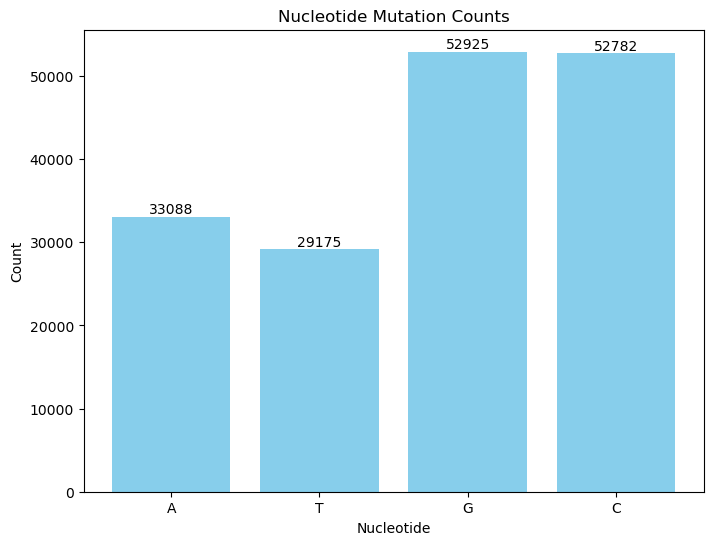

Amino Acid Mutation Counts: {'M': 1941, 'R': 4857, 'Y': 773, 'I': 3118, 'L': 6830, 'C': 586, 'S': 3370, 'A': 6996, 'T': 3314, 'P': 2339, 'V': 3343, 'H': 788, 'Q': 2734, 'E': 2701, 'K': 1393, 'G': 4050, 'D': 3127, 'W': 782, 'F': 802, 'N': 1367, '*': 195}


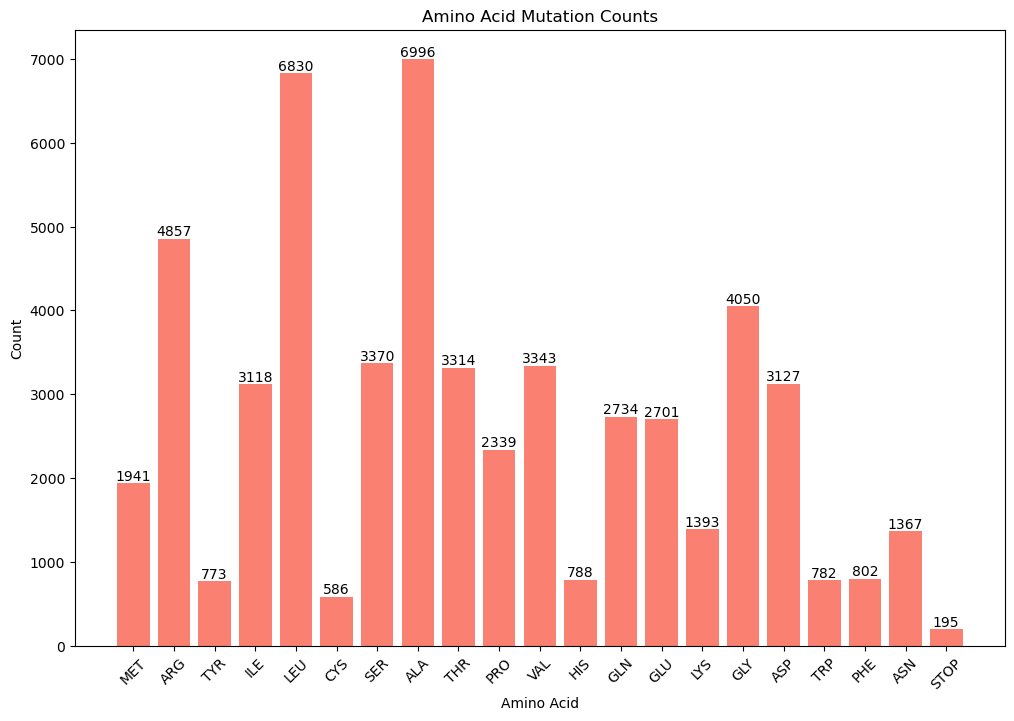

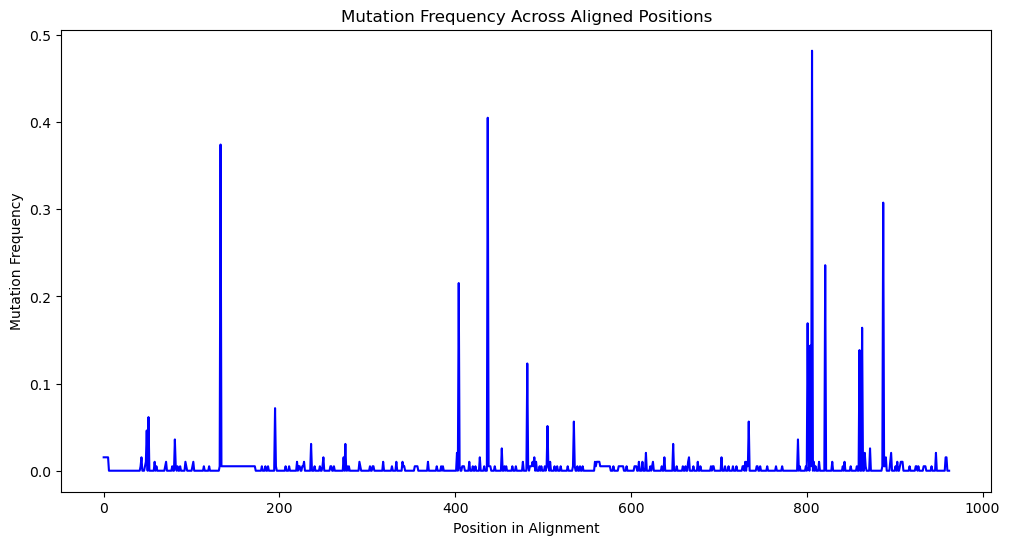

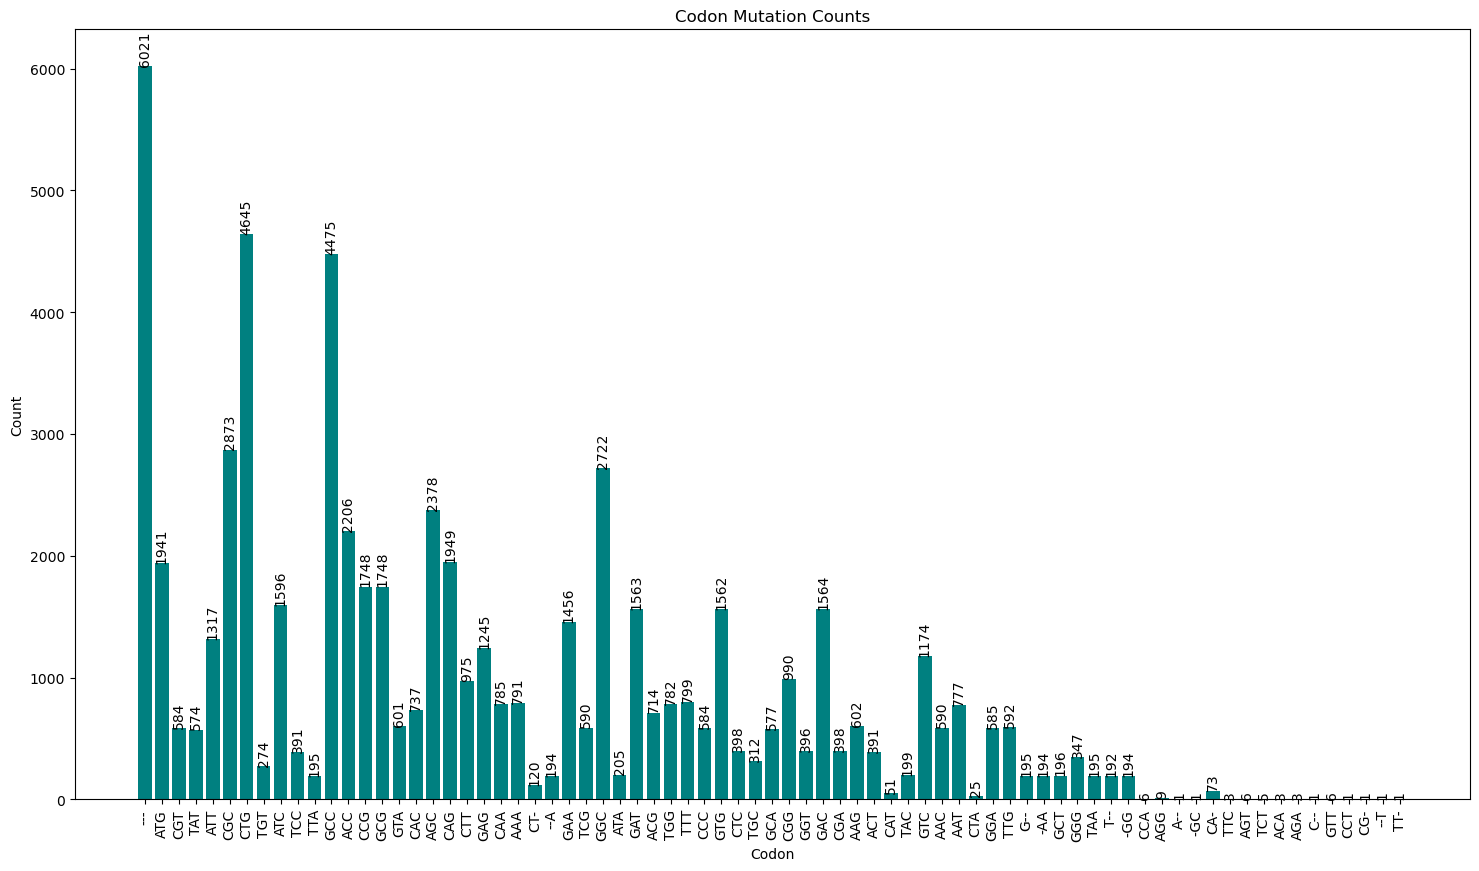

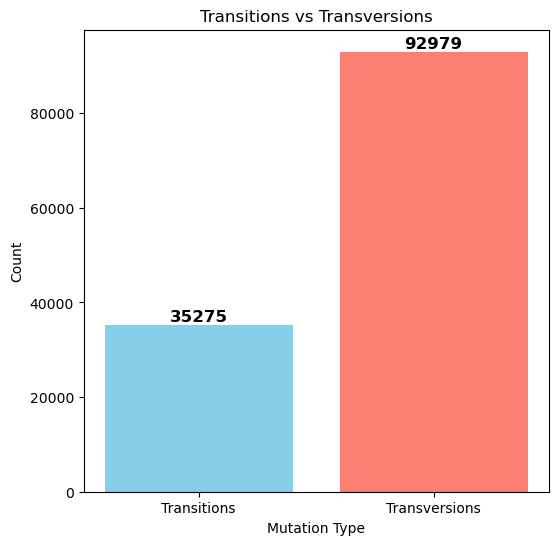

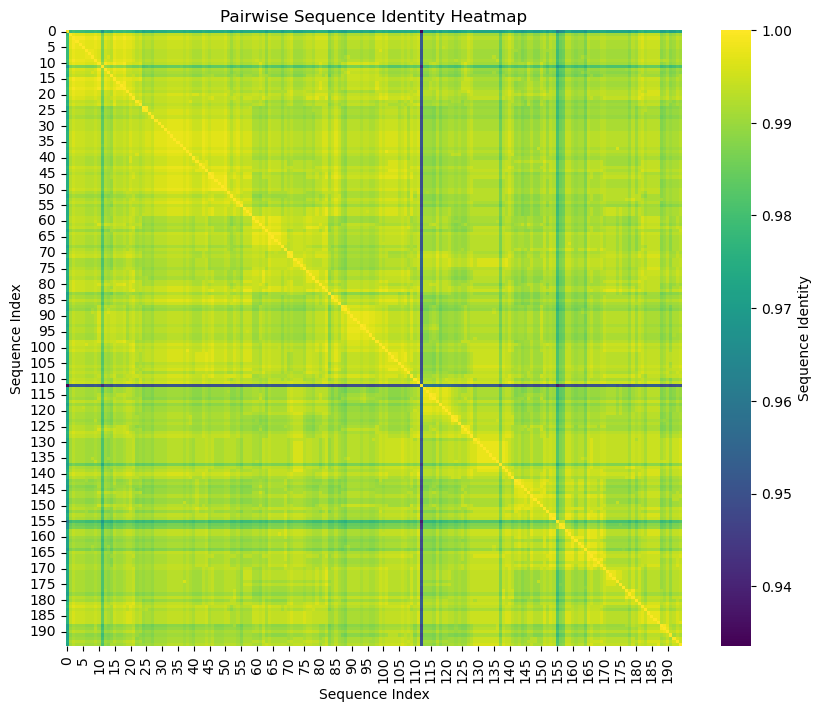

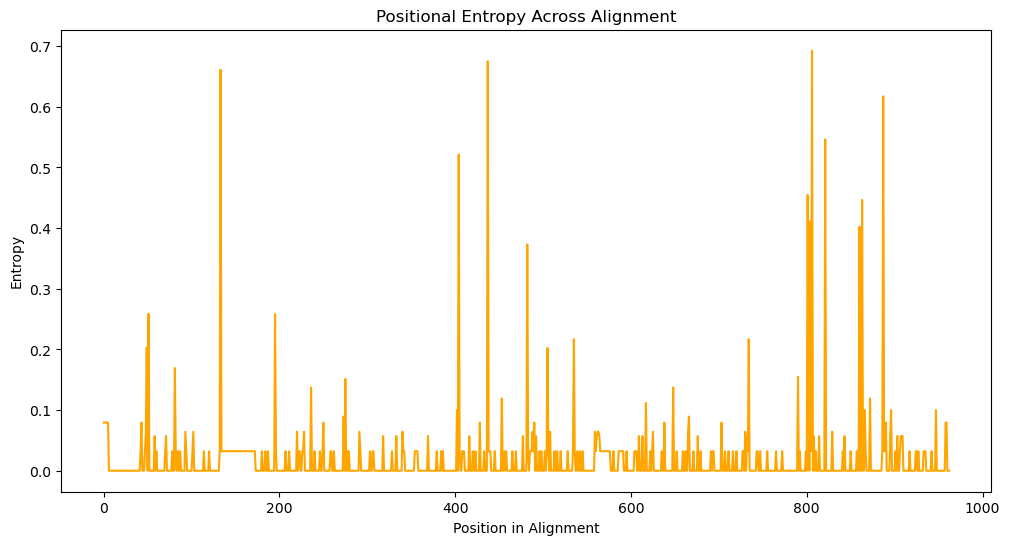

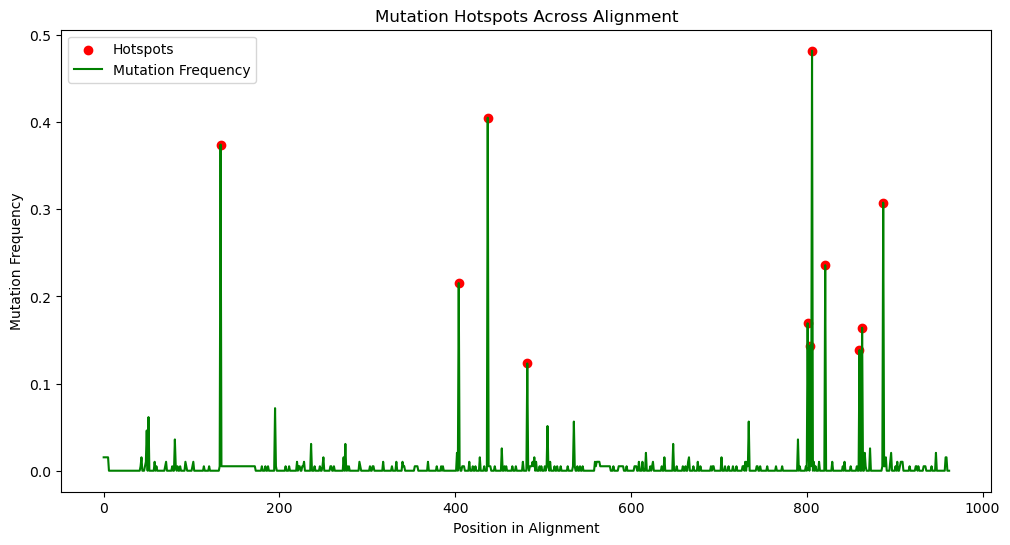

Mutation Analysis Summary:
Total Sequences Aligned: 195
Total Alignment Length: 963
Nucleotide Mutation Counts: {'A': 33088, 'T': 29175, 'G': 52925, 'C': 52782}
Amino Acid Mutation Counts: {'MET': 1941, 'ARG': 4857, 'TYR': 773, 'ILE': 3118, 'LEU': 6830, 'CYS': 586, 'SER': 3370, 'ALA': 6996, 'THR': 3314, 'PRO': 2339, 'VAL': 3343, 'HIS': 788, 'GLN': 2734, 'GLU': 2701, 'LYS': 1393, 'GLY': 4050, 'ASP': 3127, 'TRP': 782, 'PHE': 802, 'ASN': 1367, 'STOP': 195}
Transitions: 35275
Transversions: 92979
Average Pairwise Identity: 0.9913462408933295
Mean Positional Entropy: 0.019136421604885802
Mutation Hotspots: [133, 404, 437, 482, 801, 804, 806, 821, 860, 863, 887]
Task Completed


In [2]:
# Step 2.1: Analyze nucleotide mutations
def nucleotide_mutation_analysis(alignment):
    nucleotides = ['A', 'T', 'G', 'C']
    mutation_counts = {nuc: 0 for nuc in nucleotides}
    
    for record in alignment:
        seq = str(record.seq)
        for nucleotide in seq:
            if nucleotide in nucleotides:
                mutation_counts[nucleotide] += 1

    return mutation_counts

mutation_counts = nucleotide_mutation_analysis(aligned_sequences)
print("Nucleotide Mutation Counts:", mutation_counts)

# Step 2.1.1: Plot Nucleotide Mutation Counts
def plot_nucleotide_mutation_counts(mutation_counts):
    plt.figure(figsize=(8, 6))
    bars = plt.bar(mutation_counts.keys(), mutation_counts.values(), color='skyblue')
    plt.xlabel("Nucleotide")
    plt.ylabel("Count")
    plt.title("Nucleotide Mutation Counts")

    # Adding count labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

    plt.savefig("1_SHV_nucleotide_mutation_counts.svg", format="svg")
    plt.show()

plot_nucleotide_mutation_counts(mutation_counts)

# Step 2.2: Amino Acid Mutation Analysis
def codon_to_amino_acid(codon):
    genetic_code = {
        'ATA': 'I', 'ATC': 'I', 'ATT': 'I', 'ATG': 'M',
        'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
        'AAC': 'N', 'AAT': 'N', 'AAA': 'K', 'AAG': 'K',
        'AGC': 'S', 'AGT': 'S', 'AGA': 'R', 'AGG': 'R',
        'CTA': 'L', 'CTC': 'L', 'CTG': 'L', 'CTT': 'L',
        'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
        'CAC': 'H', 'CAT': 'H', 'CAA': 'Q', 'CAG': 'Q',
        'CGA': 'R', 'CGC': 'R', 'CGG': 'R', 'CGT': 'R',
        'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
        'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
        'GAC': 'D', 'GAT': 'D', 'GAA': 'E', 'GAG': 'E',
        'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G',
        'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
        'TTC': 'F', 'TTT': 'F', 'TTA': 'L', 'TTG': 'L',
        'TAC': 'Y', 'TAT': 'Y', 'TAA': '*', 'TAG': '*',
        'TGC': 'C', 'TGT': 'C', 'TGA': '*', 'TGG': 'W'
    }
    return genetic_code.get(codon, None)

def amino_acid_mutation_analysis(alignment):
    aa_counts = {}
    
    for record in alignment:
        seq = str(record.seq)
        for i in range(0, len(seq), 3):
            codon = seq[i:i+3]
            if len(codon) == 3:
                aa = codon_to_amino_acid(codon)
                if aa:
                    aa_counts[aa] = aa_counts.get(aa, 0) + 1

    return aa_counts

aa_counts = amino_acid_mutation_analysis(aligned_sequences)
print("Amino Acid Mutation Counts:", aa_counts)

# Convert single-letter amino acids to full names
aa_full_names = {
    'A': 'ALA', 'R': 'ARG', 'N': 'ASN', 'D': 'ASP', 'C': 'CYS', 'Q': 'GLN', 'E': 'GLU', 
    'G': 'GLY', 'H': 'HIS', 'I': 'ILE', 'L': 'LEU', 'K': 'LYS', 'M': 'MET', 'F': 'PHE', 
    'P': 'PRO', 'S': 'SER', 'T': 'THR', 'W': 'TRP', 'Y': 'TYR', 'V': 'VAL', '*': 'STOP'
}

# Update amino acid counts with full names
aa_counts_full_names = {aa_full_names.get(k, k): v for k, v in aa_counts.items()}

# Step 2.2.1: Plot Amino Acid Mutation Counts
def plot_amino_acid_mutation_counts(aa_counts_full_names):
    plt.figure(figsize=(12, 8))
    bars = plt.bar(aa_counts_full_names.keys(), aa_counts_full_names.values(), color='salmon')
    plt.xlabel("Amino Acid")
    plt.ylabel("Count")
    plt.title("Amino Acid Mutation Counts")
    plt.xticks(rotation=45)

    # Adding count labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

    plt.savefig("2_SHV_amino_acid_mutation_counts.svg", format="svg")
    plt.show()

plot_amino_acid_mutation_counts(aa_counts_full_names)

# Step 2.3: Mutation Frequency Analysis Across Aligned Positions
def compute_mutation_frequencies(alignment):
    num_sequences = len(alignment)
    alignment_length = alignment.get_alignment_length()
    mutation_frequencies = []

    for i in range(alignment_length):
        column = alignment[:, i]
        most_common = max(set(column), key=column.count)
        num_mutations = sum(1 for x in column if x != most_common)
        mutation_frequency = num_mutations / num_sequences
        mutation_frequencies.append(mutation_frequency)

    return mutation_frequencies

mutation_frequencies = compute_mutation_frequencies(aligned_sequences)

# Plot mutation frequency across positions
plt.figure(figsize=(12, 6))
plt.plot(mutation_frequencies, color='blue', linewidth=1.5)
plt.xlabel("Position in Alignment")
plt.ylabel("Mutation Frequency")
plt.title("Mutation Frequency Across Aligned Positions")
plt.savefig("3_SHV_mutation_frequency_across_positions.svg", format="svg")
plt.show()

# Step 2.4: Codon Mutation Pattern Analysis
def codon_mutation_analysis(alignment):
    codon_changes = Counter()
    for record in alignment:
        seq = str(record.seq)
        for i in range(0, len(seq) - 2, 3):
            codon = seq[i:i + 3]
            if len(codon) == 3:
                codon_changes[codon] += 1
    return codon_changes

codon_changes = codon_mutation_analysis(aligned_sequences)

# Plot the codon mutation counts
plt.figure(figsize=(18, 10))
bars = plt.bar(codon_changes.keys(), codon_changes.values(), color='teal')
plt.xlabel("Codon")
plt.ylabel("Count")
plt.title("Codon Mutation Counts")
plt.xticks(rotation=90)

# Adding count labels on top of bars, rotated vertically
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', rotation=90)

plt.savefig("4_SHV_codon_mutation_counts.svg", format="svg")
plt.show()


# Step 2.5: Transition and Transversion Analysis
def transition_transversion_analysis(alignment):
    transitions = 0
    transversions = 0
    purines = {'A', 'G'}
    pyrimidines = {'C', 'T'}
    
    for record in alignment:
        seq = str(record.seq)
        for i in range(1, len(seq)):
            if seq[i] != seq[i - 1]:
                if (seq[i - 1] in purines and seq[i] in purines) or (seq[i - 1] in pyrimidines and seq[i] in pyrimidines):
                    transitions += 1
                else:
                    transversions += 1

    return transitions, transversions

transitions, transversions = transition_transversion_analysis(aligned_sequences)

# Plot transitions vs. transversions
labels = ['Transitions', 'Transversions']
counts = [transitions, transversions]

plt.figure(figsize=(6, 6))
bars = plt.bar(labels, counts, color=['skyblue', 'salmon'])

# Add count labels on top of bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count), 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Mutation Type")
plt.ylabel("Count")
plt.title("Transitions vs Transversions")
plt.savefig("5_SHV_transitions_vs_transversions.svg", format="svg")
plt.show()


# Step 2.6: Pairwise Sequence Identity Heatmap
def compute_pairwise_identity(alignment):
    num_sequences = len(alignment)
    identity_matrix = np.zeros((num_sequences, num_sequences))

    for i in range(num_sequences):
        for j in range(i, num_sequences):
            identity = sum(1 for a, b in zip(alignment[i].seq, alignment[j].seq) if a == b)
            identity_matrix[i][j] = identity / len(alignment[i].seq)
            identity_matrix[j][i] = identity_matrix[i][j]

    return identity_matrix

identity_matrix = compute_pairwise_identity(aligned_sequences)

# Plot heatmap of pairwise sequence identity
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(identity_matrix, cmap="viridis", square=True, cbar_kws={"label": "Sequence Identity"})
plt.xlabel("Sequence Index")
plt.ylabel("Sequence Index")
plt.title("Pairwise Sequence Identity Heatmap")
plt.savefig("6_SHV_pairwise_sequence_identity_heatmap.svg", format="svg")
plt.show()

# Step 2.7: Entropy Analysis for Positional Variability
def positional_entropy(alignment):
    alignment_length = alignment.get_alignment_length()
    positional_entropy_values = []

    for i in range(alignment_length):
        column = alignment[:, i]
        counts = Counter(column)
        frequencies = np.array(list(counts.values())) / sum(counts.values())
        positional_entropy_values.append(entropy(frequencies))

    return positional_entropy_values

entropy_values = positional_entropy(aligned_sequences)

# Plot positional entropy
plt.figure(figsize=(12, 6))
plt.plot(entropy_values, color='orange', linewidth=1.5)
plt.xlabel("Position in Alignment")
plt.ylabel("Entropy")
plt.title("Positional Entropy Across Alignment")
plt.savefig("7_SHV_positional_entropy_across_alignment.svg", format="svg")
plt.show()

# Step 2.8: NEW - Mutation Hotspots Visualization
def identify_mutation_hotspots(mutation_frequencies, threshold=0.1):
    return [i for i, freq in enumerate(mutation_frequencies) if freq > threshold]

mutation_hotspots = identify_mutation_hotspots(mutation_frequencies)

# Plot mutation hotspots
plt.figure(figsize=(12, 6))
plt.scatter(mutation_hotspots, [mutation_frequencies[i] for i in mutation_hotspots], color='red', label='Hotspots')
plt.plot(mutation_frequencies, color='green', linewidth=1.5, label='Mutation Frequency')
plt.xlabel("Position in Alignment")
plt.ylabel("Mutation Frequency")
plt.title("Mutation Hotspots Across Alignment")
plt.legend()
plt.savefig("8_SHV_mutation_hotspots.svg", format="svg")
plt.show()

# Step 2.10: Summary of Results and Mutation Insights
print("Mutation Analysis Summary:")
print("Total Sequences Aligned:", len(aligned_sequences))
print("Total Alignment Length:", aligned_sequences.get_alignment_length())
print("Nucleotide Mutation Counts:", mutation_counts)
print("Amino Acid Mutation Counts:", aa_counts_full_names)
print("Transitions:", transitions)
print("Transversions:", transversions)
print("Average Pairwise Identity:", np.mean(identity_matrix))
print("Mean Positional Entropy:", np.mean(entropy_values))
print("Mutation Hotspots:", mutation_hotspots)

print("Task Completed")

#### TEM

In [1]:
from Bio.SeqUtils import molecular_weight
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Seq import Seq
from Bio.Align import PairwiseAligner
import pandas as pd
import numpy as np
import subprocess
import os
from collections import Counter
from scipy.stats import entropy
from Bio import AlignIO
from itertools import combinations
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('0_TEM.csv')
print(f"Data loaded successfully. Number of sequences: {len(data)}")

# Sample reference data (for SNP and mutation comparisons)
reference_sequence = "ATGAGTATTCAACATTTCCGTGTCGCCCTTATTCCCTTTTTTGCGGCATTTTGCCTTCCTGTTTTTGCTCACCCAGAAACGCTGGTGAAAGTAAAAGATGCTGAAGATCAGTTGGGTGCACGAGTGGGTTACATCGAGCTGGATCTCAACAGCGGTAAGATCCTTGAGAGTTTTCGCCCCGAAGAACGTTTTCCAATGTTGAGCACTTTTAAAGTTCTGCTATGTGGTGCGGTATTATCCCGTGTTGACGCCGGGCAAGAGCAACTCGGTCGCCGCATACACTATTCTCAGAATGACTTGGTTGAGTACTCACCAGTCACAGAAAAGCATCTTACGGATGGCATGACAGTAAGAGAATTATGCAGTGCTGCCATAACCATGAGTGATAACACTGCGGCCAACTTACTTCTGACAACGATCGGAGGACCGAAGGAGCTAACCGCTTTTTTGCACAACATGGGGGATCATGTAACCCGCCTTGATCGTTGTGAACCGGAGCTGAATGAAGCCATACCAAACGACGAGCGTGACACCACGATGCCTGCAGCAATGGCAACAACGTTGCGCAAACTATTAACTGGCGAACTACTTACTCTAGCTTCCCGGCAACAATTAATAGACTGGATGGAGGCGGATAAAGTTGCAGGACCACTTCTGCGCTCGGCCCTTCCGGCTGGCTGGTTTATTGCTGATAAATCTGGAGCCGGTGAGCGTGGATCTCGCGGTATCATTGCAGCACTGGGGCCAGATGGTAAGCCCTCCCGTATCGTAGTTATCTACACGACGGGGAGTCAGGCAACTATGGATGAACAAAATAGACAGATCGCTGAGATAGGTGCCTCACTGATTAAGCATTGGTAA"


# BLOSUM62 Substitution Matrix (simplified example)
blosum62 = {
    ('A', 'A'): 4, ('A', 'R'): -1, ('A', 'N'): -2, ('A', 'D'): -2, 
    ('A', 'C'): 0, ('A', 'Q'): -1, ('A', 'E'): -1, ('A', 'G'): 0, 
    ('A', 'H'): -1, ('A', 'I'): -1, ('A', 'L'): -1, ('A', 'K'): -1, 
    ('A', 'M'): -1, ('A', 'F'): -2, ('A', 'P'): -1, ('A', 'S'): 1, 
    ('A', 'T'): 0, ('A', 'W'): -3, ('A', 'Y'): -2, ('A', 'V'): 0,
}

# Function definitions for all required computations
def compute_gc_content(seq):
    return (seq.count("G") + seq.count("C")) / len(seq) * 100

def find_snp_positions(seq, reference):
    return [i for i, (a, b) in enumerate(zip(seq, reference)) if a != b]

def find_indels(seq, reference):
    return [i for i, (a, b) in enumerate(zip(seq, reference)) if a == '-' or b == '-']

def codon_usage(seq):
    return {seq[i:i+3]: seq.count(seq[i:i+3]) for i in range(0, len(seq) - 2, 3)}

def predict_tfbs(seq):
    return ["TFBS1", "TFBS2"]

def categorize_mutations(seq, reference):
    return [("synonymous" if a == b else "nonsynonymous") for a, b in zip(seq, reference)]

def compute_amino_acid_composition(protein_seq):
    analyzed_seq = ProteinAnalysis(protein_seq)
    return analyzed_seq.get_amino_acids_percent()

def predict_protein_stability(protein_seq):
    return "stable"

def compute_conservation(seq):
    return "high conservation"

def hydrophobicity(protein_seq):
    analyzed_seq = ProteinAnalysis(protein_seq)
    return analyzed_seq.gravy()

def secondary_structure(protein_seq):
    return "alpha-helix"

def compute_isoelectric_point(protein_seq):
    analyzed_seq = ProteinAnalysis(protein_seq)
    return analyzed_seq.isoelectric_point()

def compute_aromaticity(protein_seq):
    analyzed_seq = ProteinAnalysis(protein_seq)
    return analyzed_seq.aromaticity()

def compute_aliphatic_index(protein_seq):
    """
    Calculate the aliphatic index of a protein sequence.
    """
    analyzed_seq = ProteinAnalysis(protein_seq)
    amino_acid_content = analyzed_seq.get_amino_acids_percent()
    ala = amino_acid_content.get("A", 0)
    val = amino_acid_content.get("V", 0)
    ile = amino_acid_content.get("I", 0)
    leu = amino_acid_content.get("L", 0)
    aliphatic_index = 100 * (ala + 2.9 * val + 3.9 * (ile + leu))
    return aliphatic_index
    
def compute_flexibility(protein_seq):
    analyzed_seq = ProteinAnalysis(protein_seq)
    return np.mean(analyzed_seq.flexibility())
    
def mutational_hotspots(seq):
    return [i for i in range(len(seq)) if seq[i] in "AGCT"]

def nucleotide_mutation_frequency(seq, reference):
    freqs = {}
    for a, b in zip(seq, reference):
        if a != b:
            mutation = f"{a}>{b}"
            if mutation not in freqs:
                freqs[mutation] = 0
            freqs[mutation] += 1
    return freqs

def compute_functional_impact(alignment, blosum62):
    alignment_length = alignment.get_alignment_length()
    positional_entropy_values = []  
    functional_impact_scores = []   

    for j in range(alignment_length):
        column = alignment[:, j]
        counts = Counter(column)
        frequencies = np.array(list(counts.values())) / sum(counts.values())
        pos_entropy = entropy(frequencies)
        positional_entropy_values.append(pos_entropy)

    for sequence in alignment:
        impact_score = 0
        for j in range(alignment_length):
            column = alignment[:, j]
            counts = Counter(column)
            for (aa1, freq1), (aa2, freq2) in combinations(counts.items(), 2):
                blosum_score = blosum62.get((aa1, aa2), blosum62.get((aa2, aa1), 0))
                impact_score += blosum_score * freq1 * freq2
        functional_impact_scores.append(impact_score / alignment_length)

    return positional_entropy_values, functional_impact_scores

def align_sequences(sequences, clustalw_path="/usr/bin/clustalw"):
    with open("0_TEM_temp_sequences.fasta", "w") as f:
        for i, seq in enumerate(sequences):
            f.write(f">seq{i}\n{seq}\n")
    if not os.path.exists(clustalw_path):
        print("Error: ClustalW executable not found at specified path.")
        return None
    try:
        subprocess.run([clustalw_path, "0_TEM_temp_sequences.fasta"], check=True)
        alignment = AlignIO.read("0_TEM_temp_sequences.aln", "clustal")
        return alignment
    except subprocess.CalledProcessError:
        print("Error: ClustalW alignment failed.")
        return None

# Extract gene sequences and perform alignment
gene_sequences = data["Gene Sequence"].tolist()
aligned_sequences = align_sequences(gene_sequences)

if aligned_sequences is None:
    print("Alignment failed. Exiting program.")
    exit()

# Compute Functional Impact and Positional Entropy
positional_entropy_values, functional_impact_scores = compute_functional_impact(aligned_sequences, blosum62)

# Initialize annotations dictionary
annotations = {
    "GC_Content": [], "SNP_Positions": [], "InDel_Variants": [], "Codon_Usage": [], "TFBS": [],
    "Mutation_Types": [], "Amino_Acid_Composition": [], "Protein_Stability": [], "Functional_Impact": [],
    "Conservation": [], "Hydrophobicity": [], "Secondary_Structure": [], "Isoelectric_Point": [],
    "Mutational_Hotspots": [], "Nucleotide_Mutation_Frequency": [], "Aromaticity": [], "Aliphatic_Index": [], "Flexibility": []
}

# Compute all annotations and add them to the dictionary
for idx, row in data.iterrows():
    sequence = row["Gene Sequence"]
    protein_sequence = row["Protein"]
    
    analyzed_seq = ProteinAnalysis(protein_sequence)  # Create an instance for the current protein sequence

    annotations["GC_Content"].append(compute_gc_content(sequence))
    annotations["SNP_Positions"].append(find_snp_positions(sequence, reference_sequence))
    annotations["InDel_Variants"].append(find_indels(sequence, reference_sequence))
    annotations["Codon_Usage"].append(codon_usage(sequence))
    annotations["TFBS"].append(predict_tfbs(sequence))
    annotations["Mutation_Types"].append(categorize_mutations(sequence, reference_sequence))
    annotations["Amino_Acid_Composition"].append(compute_amino_acid_composition(protein_sequence))
    annotations["Protein_Stability"].append(predict_protein_stability(protein_sequence))
    annotations["Functional_Impact"].append(functional_impact_scores[idx])
    annotations["Conservation"].append(compute_conservation(sequence))
    annotations["Hydrophobicity"].append(hydrophobicity(protein_sequence))
    annotations["Secondary_Structure"].append(secondary_structure(protein_sequence))
    annotations["Isoelectric_Point"].append(compute_isoelectric_point(protein_sequence))
    annotations["Mutational_Hotspots"].append(mutational_hotspots(sequence))
    annotations["Nucleotide_Mutation_Frequency"].append(nucleotide_mutation_frequency(sequence, reference_sequence))
    annotations["Aromaticity"].append(analyzed_seq.aromaticity())
    annotations["Aliphatic_Index"].append(compute_aliphatic_index(protein_sequence))
    annotations["Flexibility"].append(np.mean(analyzed_seq.flexibility()))


# Convert annotations to DataFrame and save
annotations_df = pd.DataFrame(annotations)
annotated_data = pd.concat([data, annotations_df], axis=1)
annotated_data.to_csv("0_TEM_Annotations.csv", index=False)

output_filename = "0_TEM_Annotations.csv"
annotated_data.to_csv(output_filename, index=False)

# Print statement to confirm annotations
annotations_list = ", ".join(annotations.keys())

print(f"Now we have added the following annotations to {output_filename}:\n\n{annotations_list}")

print("TASK COMPLETED AND FILES WERE SAVED \n \n ")

Data loaded successfully. Number of sequences: 131



 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: seq0         861 bp
Sequence 2: seq1         861 bp
Sequence 3: seq2         861 bp
Sequence 4: seq3         861 bp
Sequence 5: seq4         861 bp
Sequence 6: seq5         861 bp
Sequence 7: seq6         861 bp
Sequence 8: seq7         861 bp
Sequence 9: seq8         861 bp
Sequence 10: seq9         861 bp
Sequence 11: seq10        861 bp
Sequence 12: seq11        861 bp
Sequence 13: seq12        861 bp
Sequence 14: seq13        861 bp
Sequence 15: seq14        861 bp
Sequence 16: seq15        861 bp
Sequence 17: seq16        861 bp
Sequence 18: seq17        861 bp
Sequence 19: seq18        861 bp
Sequence 20: seq19        861 bp
Sequence 21: seq20        861 bp
Sequence 22: seq21        861 bp
Sequence 23: seq22        861 bp
Sequence 24: seq23        861 bp
Sequence 25: seq24        861 bp
Sequence 26: seq25        861 bp
Sequence 27: seq26        

Nucleotide Mutation Counts: {'A': 29307, 'T': 28092, 'G': 28952, 'C': 26439}


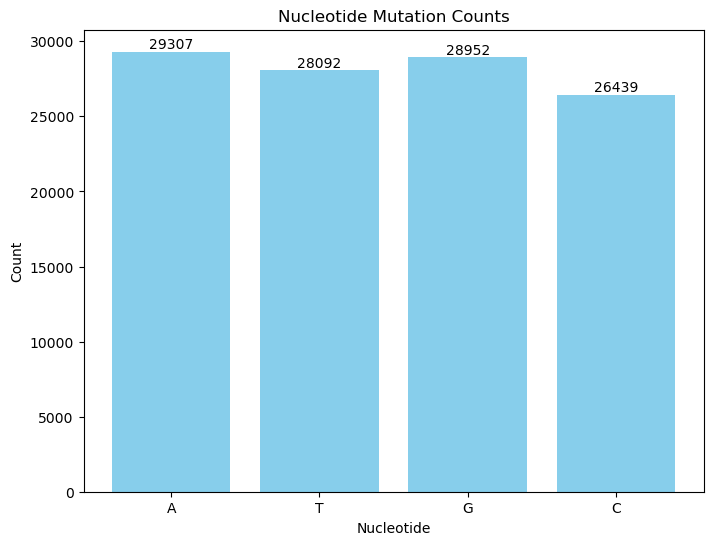

Amino Acid Mutation Counts: {'M': 1283, 'S': 2133, 'I': 2225, 'Q': 1171, 'H': 922, 'F': 1325, 'R': 2444, 'V': 1983, 'A': 3784, 'L': 4327, 'P': 1840, 'C': 398, 'E': 2571, 'T': 2631, 'K': 1504, 'D': 2109, 'G': 2736, 'Y': 522, 'N': 1042, 'W': 515, '*': 131}


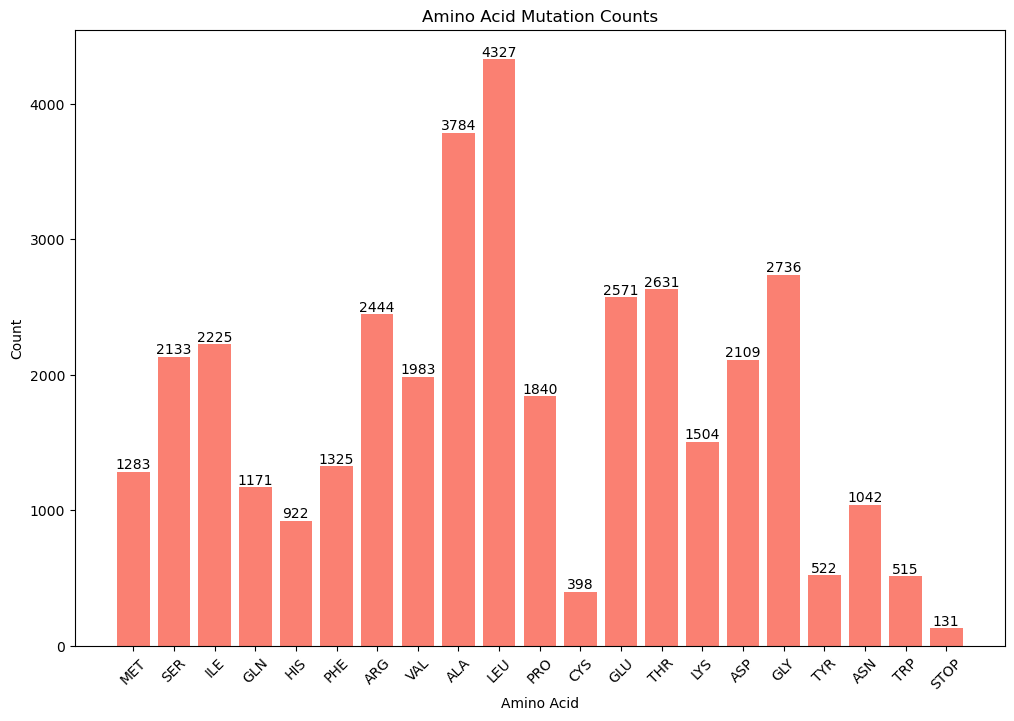

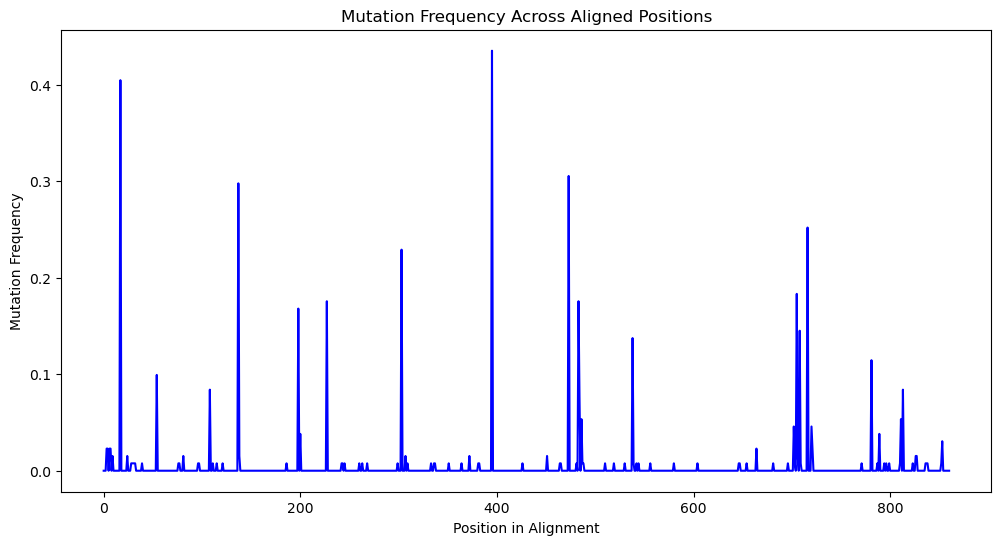

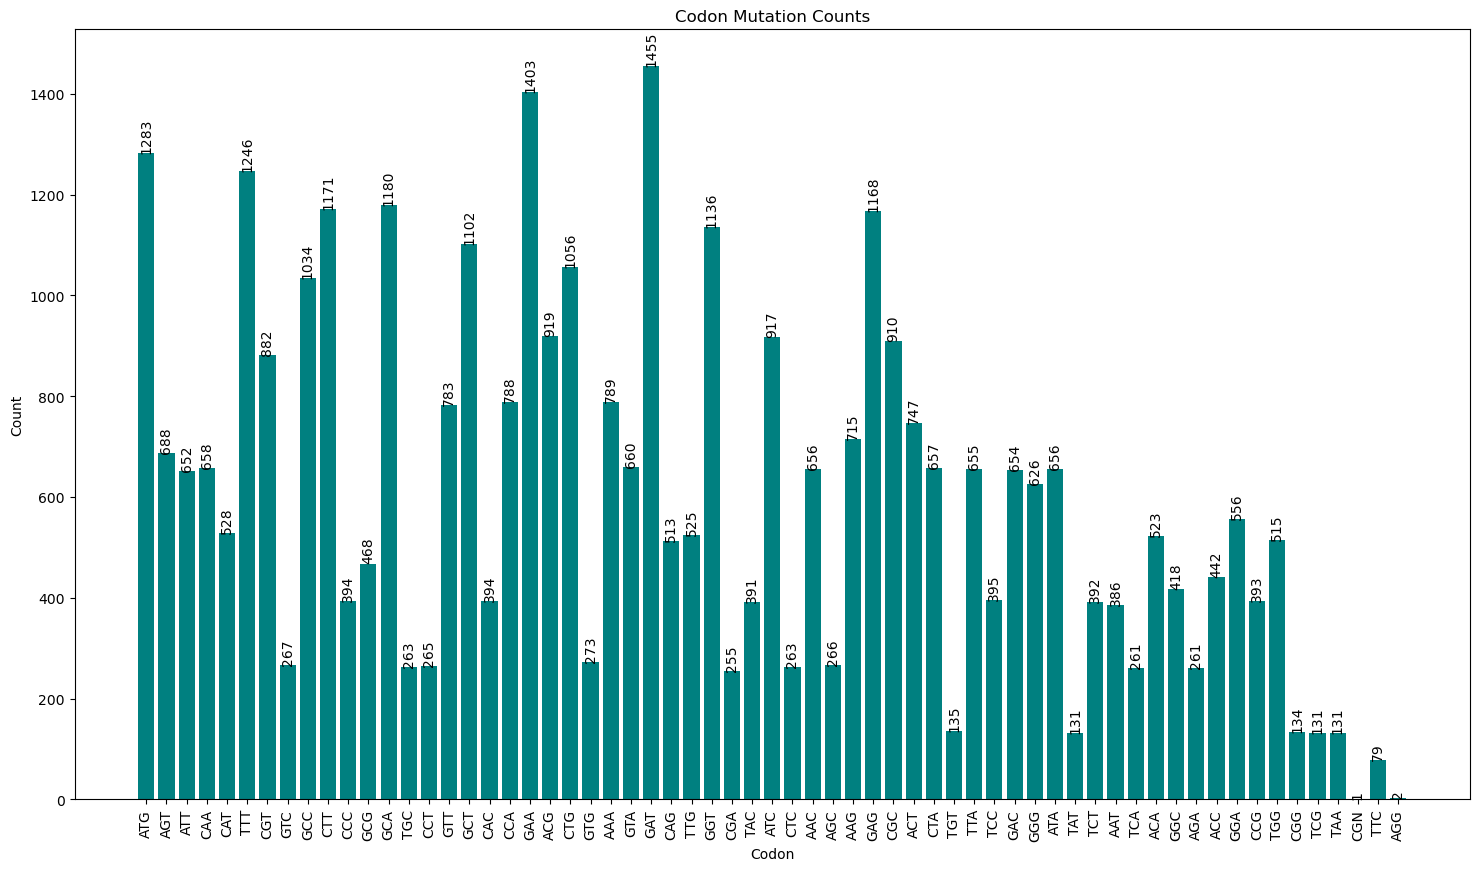

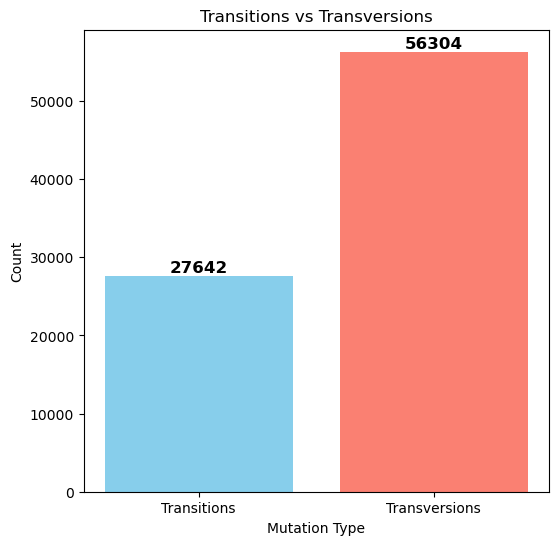

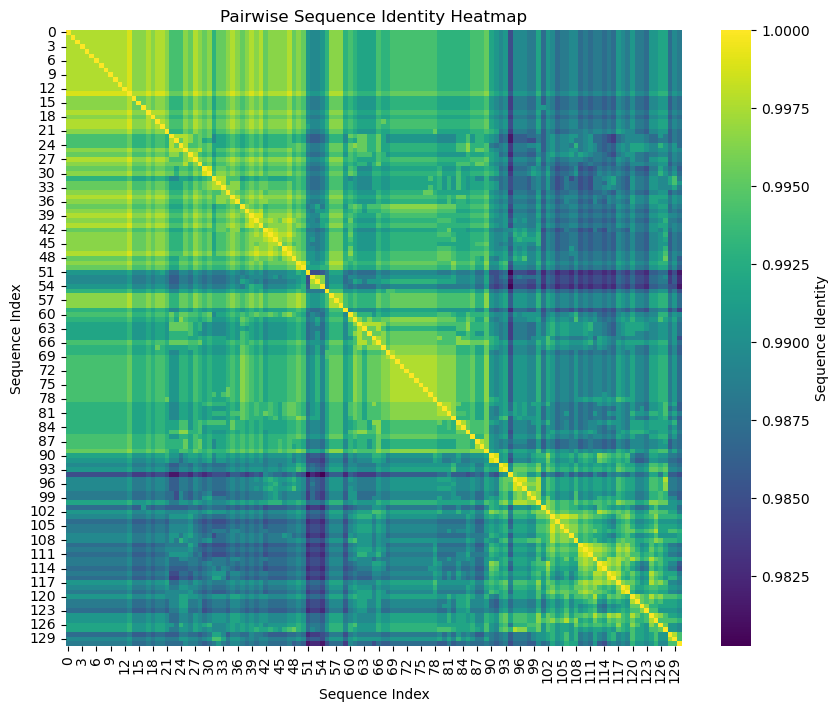

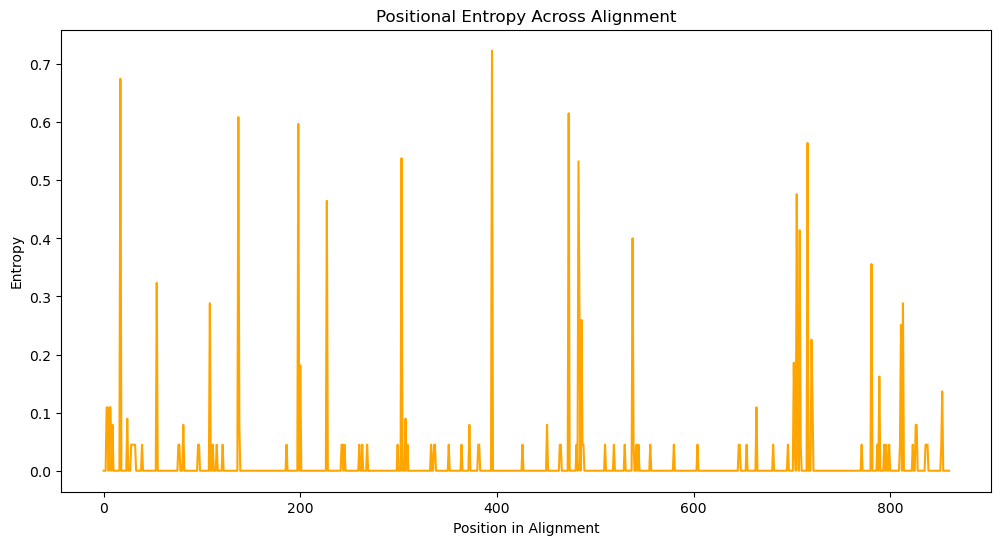

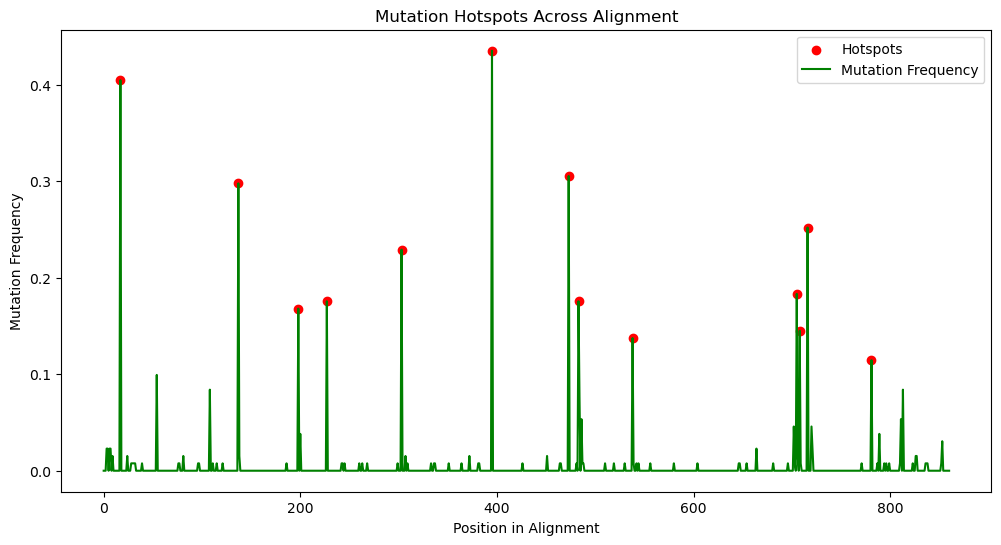

Mutation Analysis Summary:
Total Sequences Aligned: 131
Total Alignment Length: 861
Nucleotide Mutation Counts: {'A': 29307, 'T': 28092, 'G': 28952, 'C': 26439}
Amino Acid Mutation Counts: {'MET': 1283, 'SER': 2133, 'ILE': 2225, 'GLN': 1171, 'HIS': 922, 'PHE': 1325, 'ARG': 2444, 'VAL': 1983, 'ALA': 3784, 'LEU': 4327, 'PRO': 1840, 'CYS': 398, 'GLU': 2571, 'THR': 2631, 'LYS': 1504, 'ASP': 2109, 'GLY': 2736, 'TYR': 522, 'ASN': 1042, 'TRP': 515, 'STOP': 131}
Transitions: 27642
Transversions: 56304
Average Pairwise Identity: 0.9917033605558778
Mean Positional Entropy: 0.016023779105716385
Mutation Hotspots: [17, 137, 198, 227, 303, 395, 473, 483, 538, 705, 708, 716, 781]
Task Completed


In [2]:
# Step 2.1: Analyze nucleotide mutations
def nucleotide_mutation_analysis(alignment):
    nucleotides = ['A', 'T', 'G', 'C']
    mutation_counts = {nuc: 0 for nuc in nucleotides}
    
    for record in alignment:
        seq = str(record.seq)
        for nucleotide in seq:
            if nucleotide in nucleotides:
                mutation_counts[nucleotide] += 1

    return mutation_counts

mutation_counts = nucleotide_mutation_analysis(aligned_sequences)
print("Nucleotide Mutation Counts:", mutation_counts)

# Step 2.1.1: Plot Nucleotide Mutation Counts
def plot_nucleotide_mutation_counts(mutation_counts):
    plt.figure(figsize=(8, 6))
    bars = plt.bar(mutation_counts.keys(), mutation_counts.values(), color='skyblue')
    plt.xlabel("Nucleotide")
    plt.ylabel("Count")
    plt.title("Nucleotide Mutation Counts")

    # Adding count labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

    plt.savefig("1_TEM_nucleotide_mutation_counts.svg", format="svg")
    plt.show()

plot_nucleotide_mutation_counts(mutation_counts)

# Step 2.2: Amino Acid Mutation Analysis
def codon_to_amino_acid(codon):
    genetic_code = {
        'ATA': 'I', 'ATC': 'I', 'ATT': 'I', 'ATG': 'M',
        'ACA': 'T', 'ACC': 'T', 'ACG': 'T', 'ACT': 'T',
        'AAC': 'N', 'AAT': 'N', 'AAA': 'K', 'AAG': 'K',
        'AGC': 'S', 'AGT': 'S', 'AGA': 'R', 'AGG': 'R',
        'CTA': 'L', 'CTC': 'L', 'CTG': 'L', 'CTT': 'L',
        'CCA': 'P', 'CCC': 'P', 'CCG': 'P', 'CCT': 'P',
        'CAC': 'H', 'CAT': 'H', 'CAA': 'Q', 'CAG': 'Q',
        'CGA': 'R', 'CGC': 'R', 'CGG': 'R', 'CGT': 'R',
        'GTA': 'V', 'GTC': 'V', 'GTG': 'V', 'GTT': 'V',
        'GCA': 'A', 'GCC': 'A', 'GCG': 'A', 'GCT': 'A',
        'GAC': 'D', 'GAT': 'D', 'GAA': 'E', 'GAG': 'E',
        'GGA': 'G', 'GGC': 'G', 'GGG': 'G', 'GGT': 'G',
        'TCA': 'S', 'TCC': 'S', 'TCG': 'S', 'TCT': 'S',
        'TTC': 'F', 'TTT': 'F', 'TTA': 'L', 'TTG': 'L',
        'TAC': 'Y', 'TAT': 'Y', 'TAA': '*', 'TAG': '*',
        'TGC': 'C', 'TGT': 'C', 'TGA': '*', 'TGG': 'W'
    }
    return genetic_code.get(codon, None)

def amino_acid_mutation_analysis(alignment):
    aa_counts = {}
    
    for record in alignment:
        seq = str(record.seq)
        for i in range(0, len(seq), 3):
            codon = seq[i:i+3]
            if len(codon) == 3:
                aa = codon_to_amino_acid(codon)
                if aa:
                    aa_counts[aa] = aa_counts.get(aa, 0) + 1

    return aa_counts

aa_counts = amino_acid_mutation_analysis(aligned_sequences)
print("Amino Acid Mutation Counts:", aa_counts)

# Convert single-letter amino acids to full names
aa_full_names = {
    'A': 'ALA', 'R': 'ARG', 'N': 'ASN', 'D': 'ASP', 'C': 'CYS', 'Q': 'GLN', 'E': 'GLU', 
    'G': 'GLY', 'H': 'HIS', 'I': 'ILE', 'L': 'LEU', 'K': 'LYS', 'M': 'MET', 'F': 'PHE', 
    'P': 'PRO', 'S': 'SER', 'T': 'THR', 'W': 'TRP', 'Y': 'TYR', 'V': 'VAL', '*': 'STOP'
}

# Update amino acid counts with full names
aa_counts_full_names = {aa_full_names.get(k, k): v for k, v in aa_counts.items()}

# Step 2.2.1: Plot Amino Acid Mutation Counts
def plot_amino_acid_mutation_counts(aa_counts_full_names):
    plt.figure(figsize=(12, 8))
    bars = plt.bar(aa_counts_full_names.keys(), aa_counts_full_names.values(), color='salmon')
    plt.xlabel("Amino Acid")
    plt.ylabel("Count")
    plt.title("Amino Acid Mutation Counts")
    plt.xticks(rotation=45)

    # Adding count labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

    plt.savefig("2_TEM_amino_acid_mutation_counts.svg", format="svg")
    plt.show()

plot_amino_acid_mutation_counts(aa_counts_full_names)

# Step 2.3: Mutation Frequency Analysis Across Aligned Positions
def compute_mutation_frequencies(alignment):
    num_sequences = len(alignment)
    alignment_length = alignment.get_alignment_length()
    mutation_frequencies = []

    for i in range(alignment_length):
        column = alignment[:, i]
        most_common = max(set(column), key=column.count)
        num_mutations = sum(1 for x in column if x != most_common)
        mutation_frequency = num_mutations / num_sequences
        mutation_frequencies.append(mutation_frequency)

    return mutation_frequencies

mutation_frequencies = compute_mutation_frequencies(aligned_sequences)

# Plot mutation frequency across positions
plt.figure(figsize=(12, 6))
plt.plot(mutation_frequencies, color='blue', linewidth=1.5)
plt.xlabel("Position in Alignment")
plt.ylabel("Mutation Frequency")
plt.title("Mutation Frequency Across Aligned Positions")
plt.savefig("3_TEM_mutation_frequency_across_positions.svg", format="svg")
plt.show()

# Step 2.4: Codon Mutation Pattern Analysis
def codon_mutation_analysis(alignment):
    codon_changes = Counter()
    for record in alignment:
        seq = str(record.seq)
        for i in range(0, len(seq) - 2, 3):
            codon = seq[i:i + 3]
            if len(codon) == 3:
                codon_changes[codon] += 1
    return codon_changes

codon_changes = codon_mutation_analysis(aligned_sequences)

# Plot the codon mutation counts
plt.figure(figsize=(18, 10))
bars = plt.bar(codon_changes.keys(), codon_changes.values(), color='teal')
plt.xlabel("Codon")
plt.ylabel("Count")
plt.title("Codon Mutation Counts")
plt.xticks(rotation=90)

# Adding count labels on top of bars, rotated vertically
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', rotation=90)

plt.savefig("4_TEM_codon_mutation_counts.svg", format="svg")
plt.show()


# Step 2.5: Transition and Transversion Analysis
def transition_transversion_analysis(alignment):
    transitions = 0
    transversions = 0
    purines = {'A', 'G'}
    pyrimidines = {'C', 'T'}
    
    for record in alignment:
        seq = str(record.seq)
        for i in range(1, len(seq)):
            if seq[i] != seq[i - 1]:
                if (seq[i - 1] in purines and seq[i] in purines) or (seq[i - 1] in pyrimidines and seq[i] in pyrimidines):
                    transitions += 1
                else:
                    transversions += 1

    return transitions, transversions

transitions, transversions = transition_transversion_analysis(aligned_sequences)

# Plot transitions vs. transversions
labels = ['Transitions', 'Transversions']
counts = [transitions, transversions]

plt.figure(figsize=(6, 6))
bars = plt.bar(labels, counts, color=['skyblue', 'salmon'])

# Add count labels on top of bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count), 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Mutation Type")
plt.ylabel("Count")
plt.title("Transitions vs Transversions")
plt.savefig("5_TEM_transitions_vs_transversions.svg", format="svg")
plt.show()


# Step 2.6: Pairwise Sequence Identity Heatmap
def compute_pairwise_identity(alignment):
    num_sequences = len(alignment)
    identity_matrix = np.zeros((num_sequences, num_sequences))

    for i in range(num_sequences):
        for j in range(i, num_sequences):
            identity = sum(1 for a, b in zip(alignment[i].seq, alignment[j].seq) if a == b)
            identity_matrix[i][j] = identity / len(alignment[i].seq)
            identity_matrix[j][i] = identity_matrix[i][j]

    return identity_matrix

identity_matrix = compute_pairwise_identity(aligned_sequences)

# Plot heatmap of pairwise sequence identity
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(identity_matrix, cmap="viridis", square=True, cbar_kws={"label": "Sequence Identity"})
plt.xlabel("Sequence Index")
plt.ylabel("Sequence Index")
plt.title("Pairwise Sequence Identity Heatmap")
plt.savefig("6_TEM_pairwise_sequence_identity_heatmap.svg", format="svg")
plt.show()

# Step 2.7: Entropy Analysis for Positional Variability
def positional_entropy(alignment):
    alignment_length = alignment.get_alignment_length()
    positional_entropy_values = []

    for i in range(alignment_length):
        column = alignment[:, i]
        counts = Counter(column)
        frequencies = np.array(list(counts.values())) / sum(counts.values())
        positional_entropy_values.append(entropy(frequencies))

    return positional_entropy_values

entropy_values = positional_entropy(aligned_sequences)

# Plot positional entropy
plt.figure(figsize=(12, 6))
plt.plot(entropy_values, color='orange', linewidth=1.5)
plt.xlabel("Position in Alignment")
plt.ylabel("Entropy")
plt.title("Positional Entropy Across Alignment")
plt.savefig("7_TEM_positional_entropy_across_alignment.svg", format="svg")
plt.show()

# Step 2.8: NEW - Mutation Hotspots Visualization
def identify_mutation_hotspots(mutation_frequencies, threshold=0.1):
    return [i for i, freq in enumerate(mutation_frequencies) if freq > threshold]

mutation_hotspots = identify_mutation_hotspots(mutation_frequencies)

# Plot mutation hotspots
plt.figure(figsize=(12, 6))
plt.scatter(mutation_hotspots, [mutation_frequencies[i] for i in mutation_hotspots], color='red', label='Hotspots')
plt.plot(mutation_frequencies, color='green', linewidth=1.5, label='Mutation Frequency')
plt.xlabel("Position in Alignment")
plt.ylabel("Mutation Frequency")
plt.title("Mutation Hotspots Across Alignment")
plt.legend()
plt.savefig("8_TEM_mutation_hotspots.svg", format="svg")
plt.show()

# Step 2.10: Summary of Results and Mutation Insights
print("Mutation Analysis Summary:")
print("Total Sequences Aligned:", len(aligned_sequences))
print("Total Alignment Length:", aligned_sequences.get_alignment_length())
print("Nucleotide Mutation Counts:", mutation_counts)
print("Amino Acid Mutation Counts:", aa_counts_full_names)
print("Transitions:", transitions)
print("Transversions:", transversions)
print("Average Pairwise Identity:", np.mean(identity_matrix))
print("Mean Positional Entropy:", np.mean(entropy_values))
print("Mutation Hotspots:", mutation_hotspots)

print("Task Completed")

## Merging the Files and understanding the data types

In [27]:
# List of input CSV files
files = ['0_CTX-M_Annotations.csv', '0_SHV_Annotations.csv', '0_TEM_Annotations.csv']

# Dictionary to store dataframes
dataframes = {}

# Read and display headers for each file
print("Headers of input files:")
for file in files:
    try:
        df = pd.read_csv(file)
        dataframes[file] = df  # Store the dataframe
        print(f"{file}: \n{list(df.columns)}")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Check common columns among the files
common_columns = set.intersection(*(set(df.columns) for df in dataframes.values()))

if not common_columns:
    print("No common columns found among the files for merging. Exiting...")
else:
    print(f"\nCommon columns found: \n{common_columns}")

# Read and merge CSV files, skipping header for all except the first
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

# Save the merged file
df.to_csv("1_Merged_Annotations.csv", index=False)
print("\nFinal merged file header:")
print(list(merged_df.columns))
print(f"\nMerged file saved as {output_file}")

Headers of input files:
0_CTX-M_Annotations.csv: 
['Label', 'Accession', 'Direction', 'Gene Sequence', 'Allele', 'Protein', 'Gene Names', 'Product', 'locus_tag', 'Repeat Sequence', 'Repeat Unit', 'Sum_Repeats_Scores', 'Organism', 'Strain', 'TF_Sequence', 'GC_Content', 'SNP_Positions', 'InDel_Variants', 'Codon_Usage', 'TFBS', 'Mutation_Types', 'Amino_Acid_Composition', 'Protein_Stability', 'Functional_Impact', 'Conservation', 'Hydrophobicity', 'Secondary_Structure', 'Isoelectric_Point', 'Mutational_Hotspots', 'Nucleotide_Mutation_Frequency', 'Aromaticity', 'Aliphatic_Index', 'Flexibility']
0_SHV_Annotations.csv: 
['Label', 'Accession', 'Direction', 'Gene Sequence', 'Allele', 'Protein', 'Gene Names', 'Product', 'locus_tag', 'Repeat Sequence', 'Repeat Unit', 'Sum_Repeats_Scores', 'Organism', 'Strain', 'TF_Sequence', 'GC_Content', 'SNP_Positions', 'InDel_Variants', 'Codon_Usage', 'TFBS', 'Mutation_Types', 'Amino_Acid_Composition', 'Protein_Stability', 'Functional_Impact', 'Conservation', '

#### Data Visualisation

In [28]:
# Display column types and handle non-numeric columns
files = ['1_Merged_Annotations.csv']
print("Column Types:\n", df.dtypes)
print("\n Number of columns:", df.shape[1])
print("\n Column names:\n", df.columns.tolist())
print("\n \n \n \n \n \n Header of the Merged File: \n")
df.head()

Column Types:
 Label                             object
Accession                         object
Direction                         object
Gene Sequence                     object
Allele                            object
Protein                           object
Gene Names                        object
Product                           object
locus_tag                         object
Repeat Sequence                   object
Repeat Unit                       object
Sum_Repeats_Scores                 int64
Organism                          object
Strain                            object
TF_Sequence                       object
GC_Content                       float64
SNP_Positions                     object
InDel_Variants                    object
Codon_Usage                       object
TFBS                              object
Mutation_Types                    object
Amino_Acid_Composition            object
Protein_Stability                 object
Functional_Impact                float64
C

Label  Accession Direction  \
0     C  NG_048995   forward   
1     D  NG_048897   forward   
2     D  NG_048898   forward   
3     D  NG_048899   forward   
4     D  NG_048900   forward   

                                       Gene Sequence        Allele  \
0  ATGAT---------GACTCAGAGCATTCGCCGCTCAATGTTAACGG...   blaCTX-M-44   
1  ATGGT---------TAAAAAATCACTGCGTCAGTTCACGCTGATGG...    blaCTX-M-1   
2  ATGGT---------TAAAAAATCACTGCGCCAGTTCACGCTGATGG...   blaCTX-M-10   
3  ATGAT---------GAGAAAAAGCGTAAGGCGGGCGATGTTAATGA...  blaCTX-M-100   
4  ATGGT---------TAAAAAATCACTGCGCCAGTTCACGCTGATGG...  blaCTX-M-101   

                                             Protein Gene Names  \
0  MMTQSIRRSMLTVMATLPLLFSSATLHAQANSVQQQLEALEKSSGG...   blaCTX-M   
1  MVKKSLRQFTLMATATVTLLLGSVPLYAQTADVQQKLAELERQSGG...   blaCTX-M   
2  MVKKSLRQFTLMATATVTLLLGSVPLYAQTVDVQQKLAELEQQSGG...   blaCTX-M   
3  MMRKSVRRAMLMTTACVSLLLASVPLCAQANDVQQKLAALEKSSGG...   blaCTX-M   
4  MVKKSLRQFTLMATATVTLLLGSVPLYAQTADVQQKLAELERQSGG...   blaCTX-M   

                    Product    locus_tag  \
0   beta-lactamase CTX-M-44  A7J11_00286   
1    beta-lactamase CTX-M-1  A7J11_00459   
2   beta-lactamase CTX-M-10  A7J11_00967   
3  beta-lactamase CTX-M-100  A7J11_02608   
4  beta-lactamase CTX-M-101  A7J11_02627   

                         Repeat Sequence  ... Functional_Impact  \
0  AGAGCGAGAGCGA: GTCTTGTCTTG: GCGGCGGCG  ...         -0.038418   
1               TGGCCGTGGCCG: TGTTGTTGTT  ...         -0.038418   
2   GGCCGCGGCCGCGG: TGTTGTTGTT: AAAAAAAA  ...         -0.038418   
3                              GCGGCGGCG  ...         -0.038418   
4             GGCCGCGGCCGCGG: TGTTGTTGTT  ...         -0.038418   

        Conservation Hydrophobicity Secondary_Structure Isoelectric_Point  \
0  high conservation      -0.211340         alpha-helix          9.116039   
1  high conservation      -0.176632         alpha-helix          9.252390   
2  high conservation      -0.164261         alpha-helix          9.095345   
3  high conservation      -0.120619         alpha-helix          8.955900   
4  high conservation      -0.147079         alpha-helix          9.380553   

                                 Mutational_Hotspots  \
0  [0, 1, 2, 3, 4, 14, 15, 16, 17, 18, 19, 20, 21...   
1  [0, 1, 2, 3, 4, 14, 15, 16, 17, 18, 19, 20, 21...   
2  [0, 1, 2, 3, 4, 14, 15, 16, 17, 18, 19, 20, 21...   
3  [0, 1, 2, 3, 4, 14, 15, 16, 17, 18, 19, 20, 21...   
4  [0, 1, 2, 3, 4, 14, 15, 16, 17, 18, 19, 20, 21...   

                       Nucleotide_Mutation_Frequency Aromaticity  \
0                                                 {}     0.04811   
1  {'G>A': 28, 'T>G': 12, 'A>C': 20, 'A>T': 8, 'A...     0.04811   
2  {'G>A': 24, 'T>G': 11, 'A>C': 17, 'A>T': 8, 'A...     0.04811   
3  {'G>C': 21, 'A>T': 9, 'A>C': 6, 'A>G': 21, 'G>...     0.04811   
4  {'G>A': 29, 'T>G': 12, 'A>C': 19, 'A>T': 7, 'A...     0.04811   

  Aliphatic_Index Flexibility  
0       88.969072    1.001763  
1       90.927835    1.001898  
2       91.271478    1.001720  
3       87.628866    0.999731  
4       91.958763    1.001252  

[5 rows x 33 columns]

## Computations of Mutation Pattern

#### Conserved Nucleotides

In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Missing values filled.
Conserved nucleotide data saved to 9_conserved_nucleotides.csv



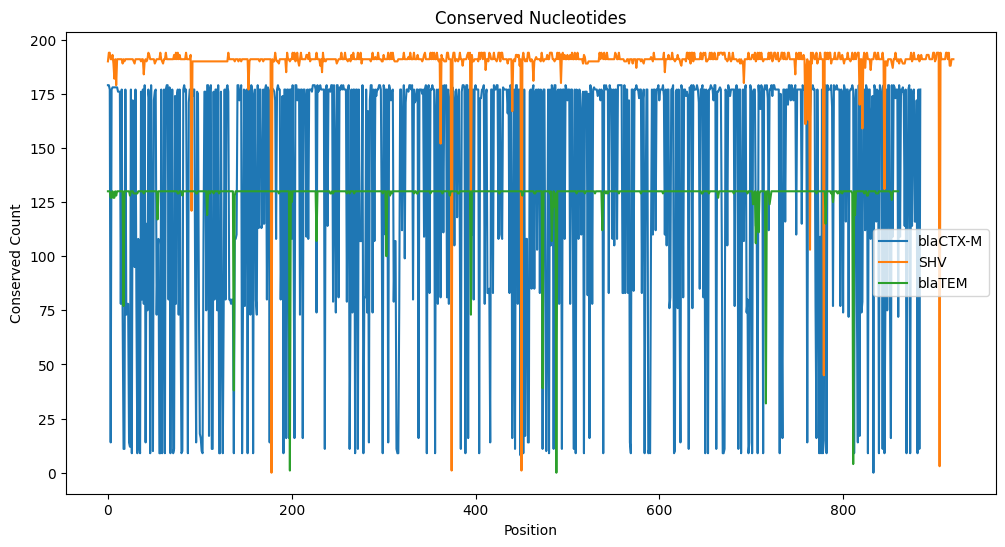

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('1_Merged_Annotations.csv')

# Define relevant columns for analysis
columns_to_include = [
    'Accession', 'Gene Sequence', 'Gene Names', 'Allele', 'Protein', 'Repeat Sequence', 
    'Repeat Unit', 'Sum_Repeats_Scores', 'Strain', 'TF_Sequence', 'GC_Content', 
    'SNP_Positions', 'InDel_Variants', 'Codon_Usage', 'Amino_Acid_Composition', 
    'Protein_Stability', 'Conservation', 'Hydrophobicity', 'Functional_Impact',
    'Secondary_Structure', 'Isoelectric_Point', 'Nucleotide_Mutation_Frequency', 
    'Label', 'Mutational_Hotspots'
]
df = df[columns_to_include]

# Fill missing values
df.fillna({'Gene Sequence': 'Unknown', 'Protein': 'Unknown'}, inplace=True)
numerical_cols = ['Sum_Repeats_Scores', 'GC_Content', 'Protein_Stability', 'Hydrophobicity', 'Isoelectric_Point', 'Mutational_Hotspots']
df[numerical_cols] = df[numerical_cols].fillna(0)
print("Missing values filled.")

# Encode categorical data
le_strain = LabelEncoder()
df['Label'] = le_strain.fit_transform(df['Label'])

# Function to compute conserved nucleotides
def compute_conserved_nucleotides(df, gene_names, label_col='Label', sequence_col_nucleotide='Gene Sequence', output_file_nucleotide='9_conserved_nucleotides.csv'):
    nucleotide_results = []
    plt.figure(figsize=(12, 6))
    
    for gene in gene_names:
        gene_data = df[df['Gene Names'] == gene]
        control_data = gene_data[gene_data[label_col] == 0]  # Assuming '0' is for control
        if control_data.empty:
            print(f"No control samples found for {gene}")
            continue
        control_seq_nucleotide = control_data.iloc[0][sequence_col_nucleotide]  # First control sequence
        
        conserved_count_nucleotide = np.zeros(len(control_seq_nucleotide))
        
        for _, row in gene_data.iterrows():
            if row[label_col] == 1:  # Disease samples
                seq_nucleotide = row[sequence_col_nucleotide]
                for i in range(min(len(control_seq_nucleotide), len(seq_nucleotide))):
                    if control_seq_nucleotide[i] == seq_nucleotide[i]:
                        conserved_count_nucleotide[i] += 1
        
        nucleotide_results.append(pd.DataFrame({
            'Position': np.arange(len(control_seq_nucleotide)),
            'Conserved_Count': conserved_count_nucleotide,
            'Gene': gene,
            'Nucleotide': list(control_seq_nucleotide)
        }))
        
        plt.plot(np.arange(len(control_seq_nucleotide)), conserved_count_nucleotide, label=gene)
    
    final_nucleotide_results = pd.concat(nucleotide_results, ignore_index=True)
    final_nucleotide_results.sort_values(by='Conserved_Count', ascending=False, inplace=True)
    final_nucleotide_results.to_csv(output_file_nucleotide, index=False)
    print(f"Conserved nucleotide data saved to {output_file_nucleotide}\n")
    
    plt.xlabel('Position')
    plt.ylabel('Conserved Count')
    plt.legend()
    plt.title('Conserved Nucleotides')
    plt.savefig("9_conserved_nucleotides.svg", format="svg")
    plt.show()

# Call function for selected genes
compute_conserved_nucleotides(df, ['blaCTX-M', 'SHV', 'blaTEM'])

#### Conserved Amino Acids

C:\Users\Shaba\AppData\Local\Temp\ipykernel_1384\3592032506.py:34: UserWarning: Ignoring specified arguments in this call because figure with num: 2 already exists
  plt.figure(2, figsize=(12, 6))  # Set larger figure size


Conserved protein residues data saved to 10_conserved_residues.csv


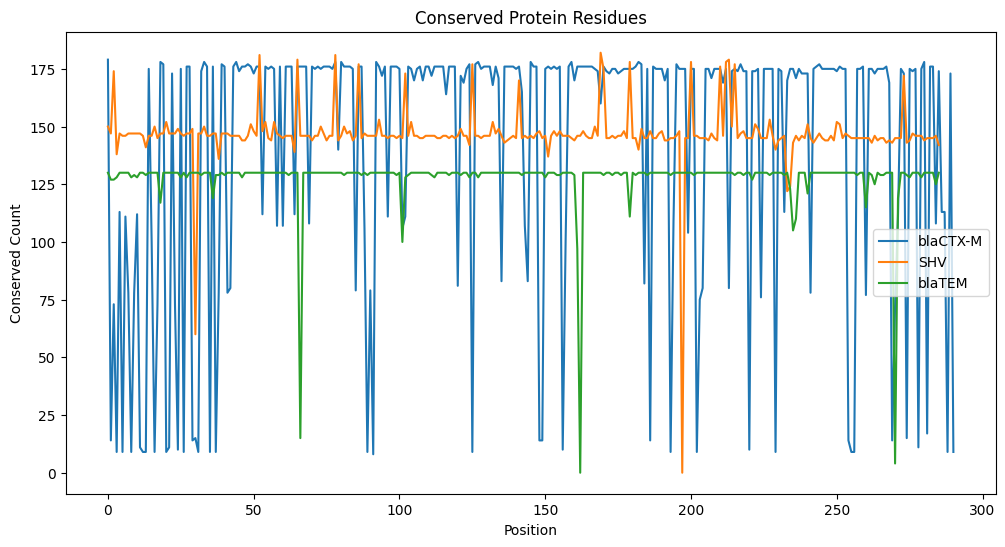

In [9]:
def compute_conserved_proteins(df, gene_names, label_col='Label', sequence_col_protein='Protein', output_file_protein='10_conserved_residues.csv'):
    protein_results = []
    
    for gene in gene_names:
        # Filter data for the gene
        gene_data = df[df['Gene Names'] == gene]
        
        # Extract control (C) data
        control_data = gene_data[gene_data[label_col] == 0]  # Assuming '0' is for control
        control_seq_protein = control_data[sequence_col_protein].values[0]  # Protein sequence
        
        # Initialize count array
        conserved_count_protein = np.zeros(len(control_seq_protein))
        
        # Iterate over disease samples
        for _, row in gene_data.iterrows():
            if row[label_col] == 1:  # Assuming '1' is for disease
                seq_protein = row[sequence_col_protein]
                
                # Compute conserved positions for protein residues
                for i in range(min(len(control_seq_protein), len(seq_protein))):
                    if control_seq_protein[i] == seq_protein[i]:
                        conserved_count_protein[i] += 1
        
        # Create DataFrame for protein results
        protein_results.append(pd.DataFrame({
            'Position': np.arange(len(control_seq_protein)),
            'Conserved_Count': conserved_count_protein,
            'Gene': gene,
            'Residue': list(control_seq_protein)  # Add protein sequence information
        }))
        
        # Plot the conserved protein data
        plt.figure(2, figsize=(12, 6))  # Set larger figure size
        plt.plot(np.arange(len(control_seq_protein)), conserved_count_protein, label=gene)
    
    # Combine protein results
    final_protein_results = pd.concat(protein_results, ignore_index=True)
    
    # Sort by conserved count (descending order)
    final_protein_results = final_protein_results.sort_values(by='Conserved_Count', ascending=False)
    
    # Save protein results to CSV
    final_protein_results.to_csv(output_file_protein, index=False)
    print(f"Conserved protein residues data saved to {output_file_protein}")
    
    # Plot and save the figure
    plt.figure(2)
    plt.xlabel('Position')
    plt.ylabel('Conserved Count')
    plt.legend()
    plt.title('Conserved Protein Residues')
    plt.savefig("10_conserved_protein_residues.svg", format="svg")  # Save the plot
    plt.show()

# Call function for the three genes
compute_conserved_proteins(df, ['blaCTX-M', 'SHV', 'blaTEM'])

#### Mutated Nuclotide 

C:\Users\Shaba\AppData\Local\Temp\ipykernel_1384\580026974.py:32: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  plt.figure(1, figsize=(12, 6))  # Set larger figure size
C:\Users\Shaba\AppData\Local\Temp\ipykernel_1384\580026974.py:47: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  plt.figure(1, figsize=(12, 6))


Mutated nucleotide data saved to 11_mutated_nucleotides.csv


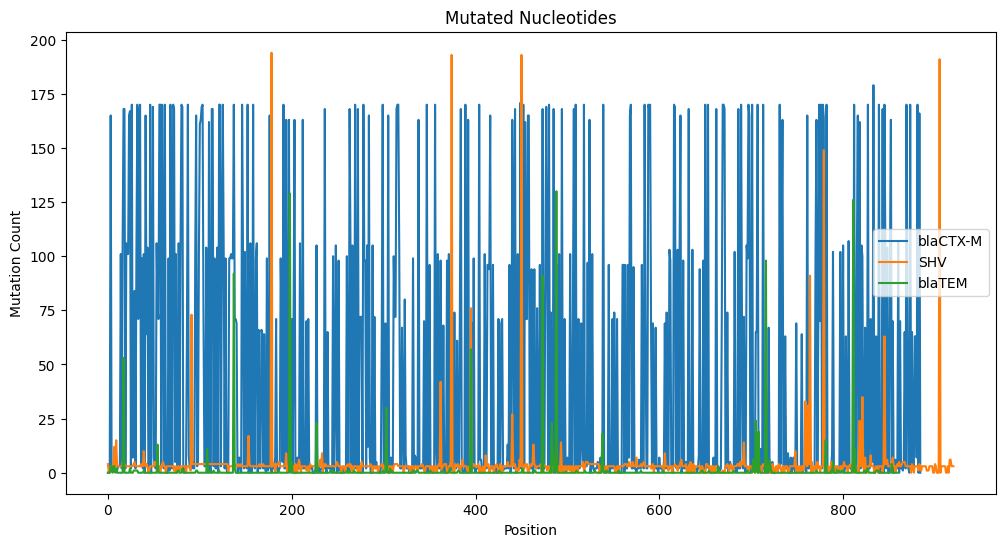

In [10]:
def compute_mutated_nucleotides(df, gene_names, label_col='Label', sequence_col='Gene Sequence', output_file='11_mutated_nucleotides.csv'):
    nucleotide_results = []
    
    for gene in gene_names:
        # Filter data for the gene
        gene_data = df[df['Gene Names'] == gene]
        
        # Extract control (C) data
        control_data = gene_data[gene_data[label_col] == 0]
        control_seq_nucleotide = control_data[sequence_col].values[0]
        
        # Initialize mutation count array
        mutation_count_nucleotide = np.zeros(len(control_seq_nucleotide))
        
        # Iterate over disease samples
        for _, row in gene_data.iterrows():
            if row[label_col] == 1:
                seq_nucleotide = row[sequence_col]
                for i, (c, s) in enumerate(zip(control_seq_nucleotide, seq_nucleotide)):
                    if c != s:
                        mutation_count_nucleotide[i] += 1
        
        # Save results for each gene
        nucleotide_results.append(pd.DataFrame({
            'Position': np.arange(len(control_seq_nucleotide)),
            'Mutation_Count': mutation_count_nucleotide,
            'Gene': gene,
            'Nucleotide': list(control_seq_nucleotide)
        }))
        
        # Plot the mutated nucleotides
        plt.figure(1, figsize=(12, 6))  # Set larger figure size 
        plt.plot(np.arange(len(control_seq_nucleotide)), mutation_count_nucleotide, label=gene)
    
    # Combine nucleotide results
    final_nucleotide_results = pd.concat(nucleotide_results, ignore_index=True)
        
    # Sort by conserved count (descending order)
    final_nucleotide_results = final_nucleotide_results.sort_values(by='Mutation_Count', ascending=False)
    

    # Save to CSV
    final_nucleotide_results.to_csv(output_file, index=False)
    print(f"Mutated nucleotide data saved to {output_file}")
    
    # Plot and save the figure
    plt.figure(1, figsize=(12, 6))
    plt.xlabel('Position')
    plt.ylabel('Mutation Count')
    plt.legend()
    plt.title('Mutated Nucleotides')
    plt.savefig("11_mutated_nucleotides.svg", format="svg")  # Save the plot
    plt.show()

# Call function for the three genes    
compute_mutated_nucleotides(df, ['blaCTX-M', 'SHV', 'blaTEM'])

#### Mutated Amino Acids

C:\Users\Shaba\AppData\Local\Temp\ipykernel_1384\3196890017.py:32: UserWarning: Ignoring specified arguments in this call because figure with num: 2 already exists
  plt.figure(2, figsize=(12, 6))  # Set larger figure size
C:\Users\Shaba\AppData\Local\Temp\ipykernel_1384\3196890017.py:47: UserWarning: Ignoring specified arguments in this call because figure with num: 2 already exists
  plt.figure(2, figsize=(12, 6))


Mutated protein data saved to 12_mutated_residues.csv


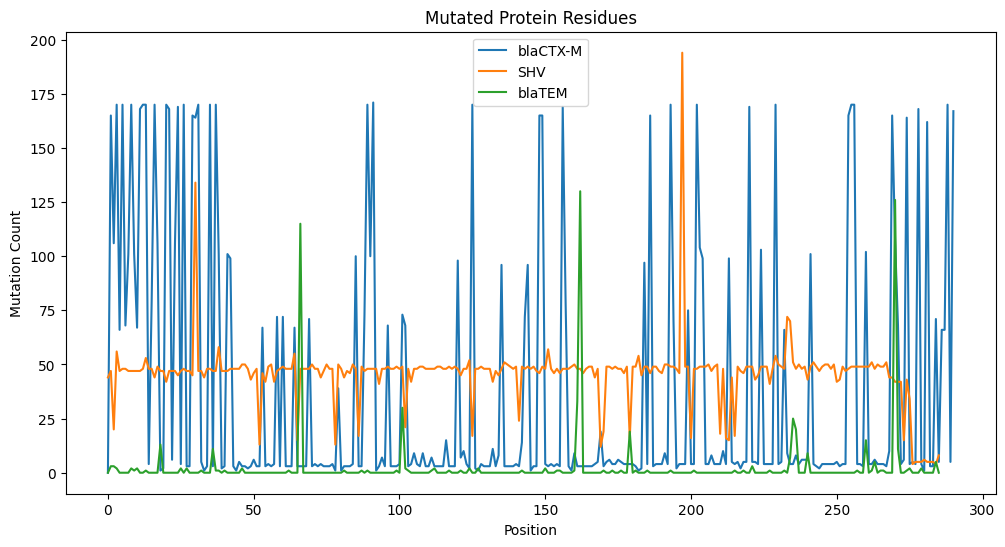

In [11]:
def compute_mutated_residues(df, gene_names, label_col='Label', sequence_col='Protein', output_file='12_mutated_residues.csv'):
    protein_results = []
    
    for gene in gene_names:
        # Filter data for the gene
        gene_data = df[df['Gene Names'] == gene]
        
        # Extract control (C) data
        control_data = gene_data[gene_data[label_col] == 0]
        control_seq_protein = control_data[sequence_col].values[0]
        
        # Initialize mutation count array
        mutation_count_protein = np.zeros(len(control_seq_protein))
        
        # Iterate over disease samples
        for _, row in gene_data.iterrows():
            if row[label_col] == 1:
                seq_protein = row[sequence_col]
                for i, (c, s) in enumerate(zip(control_seq_protein, seq_protein)):
                    if c != s:
                        mutation_count_protein[i] += 1
        
        # Save results for each gene
        protein_results.append(pd.DataFrame({
            'Position': np.arange(len(control_seq_protein)),
            'Mutation_Count': mutation_count_protein,
            'Gene': gene,
            'Residue': list(control_seq_protein)
        }))
        
        # Plot the mutated residues
        plt.figure(2, figsize=(12, 6))  # Set larger figure size
        plt.plot(np.arange(len(control_seq_protein)), mutation_count_protein, label=gene)
    
    # Combine protein results
    final_protein_results = pd.concat(protein_results, ignore_index=True)
            
    # Sort by conserved count (descending order)
    final_protein_results = final_protein_results.sort_values(by='Mutation_Count', ascending=False)
 
    
    # Save to CSV
    final_protein_results.to_csv(output_file, index=False)
    print(f"Mutated protein data saved to {output_file}")
    
    # Plot and save the figure
    plt.figure(2, figsize=(12, 6))
    plt.xlabel('Position')
    plt.ylabel('Mutation Count')
    plt.legend()
    plt.title('Mutated Protein Residues')
    plt.savefig("12_mutated_residues.svg", format="svg")  # Save the plot
    plt.show()
    
# Call function for the three genes    
compute_mutated_residues(df, ['blaCTX-M', 'SHV', 'blaTEM'])

#### Mutation Probabilities on Nucleotides


Mutation probability plot for blaCTX-M saved to 13_A_blaCTX-M.svg


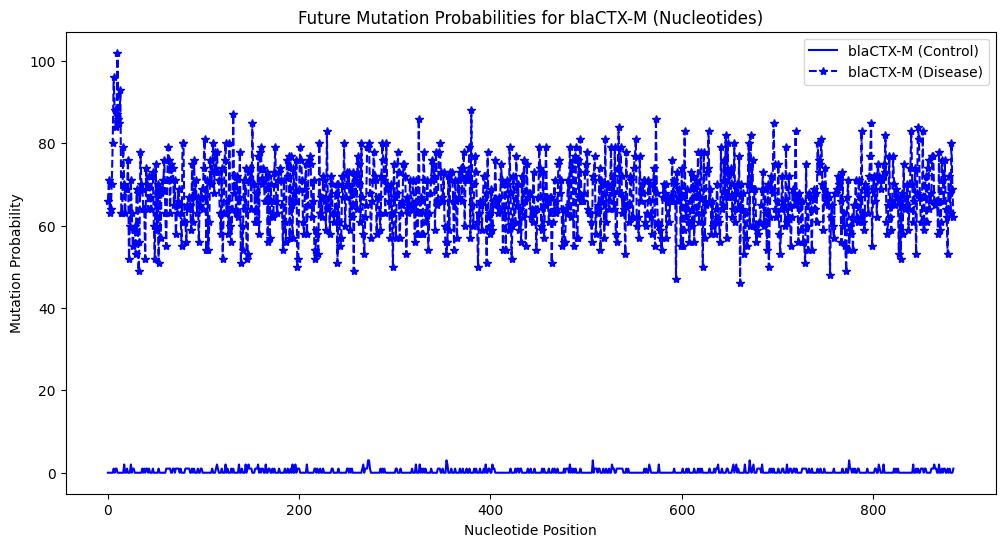


Mutation probability plot for SHV saved to 13_B_SHV.svg


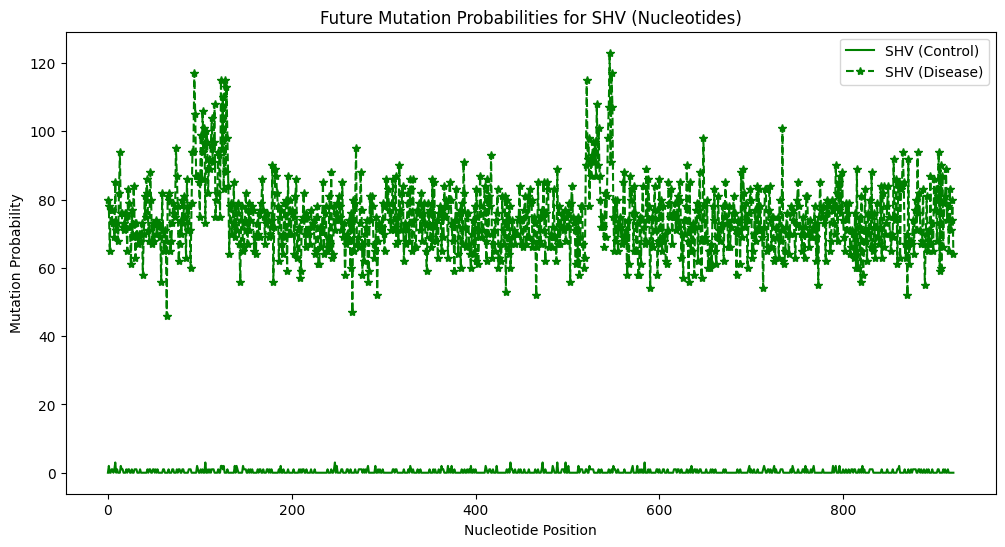


Mutation probability plot for blaTEM saved to 13_C_blaTEM.svg


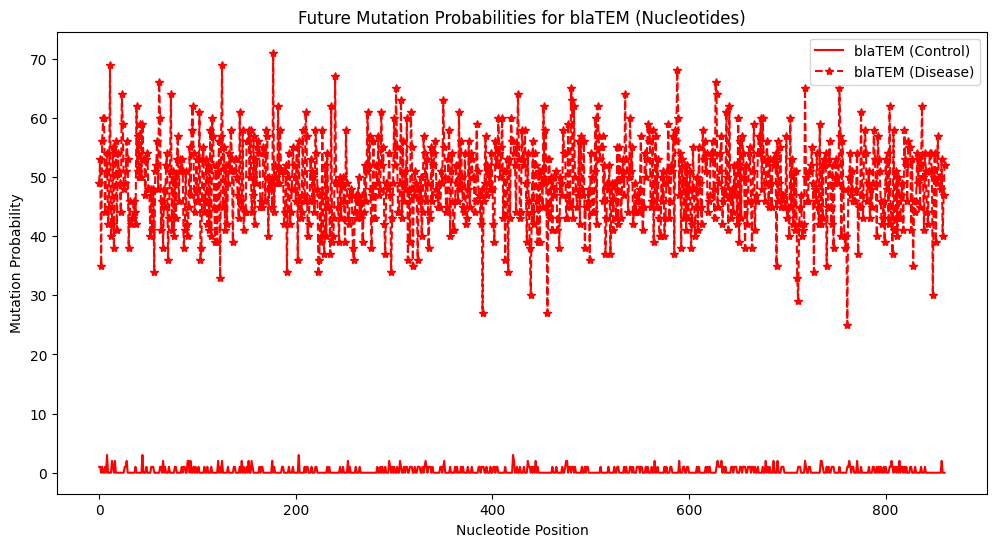


Mutation probabilities saved to 13_nucleotide_mutation_probabilities.csv


In [12]:
def plot_nucleotide_mutation_probabilities(df, gene_names, sequence_col='Gene Sequence', output_csv_prefix='13_nucleotide_mutation_probabilities'):
    results = []
    colors = ['blue', 'green', 'red']  # Colors for each gene

    for idx, gene in enumerate(gene_names):
        gene_data = df[df['Gene Names'] == gene]
        
        # Control data
        control_data = gene_data[gene_data['Label'] == 0]
        control_seq = control_data[sequence_col].values[0]
        control_seq_length = len(control_seq)
        
        mutation_counts_control = np.zeros(control_seq_length)
        mutation_counts_disease = np.zeros(control_seq_length)
        
        # Simulate mutations for control
        for _ in range(5):  # Five future predictions
            future_seq = list(control_seq)
            mutation_positions = np.random.choice(control_seq_length, size=int(control_seq_length * 0.1), replace=False)
            for pos in mutation_positions:
                future_seq[pos] = np.random.choice(['A', 'C', 'G', 'T'])
            for i, (c, f) in enumerate(zip(control_seq, future_seq)):
                if c != f:
                    mutation_counts_control[i] += 1
        
        # Simulate mutations for disease
        for _, row in gene_data[gene_data['Label'] == 1].iterrows():
            seq = row[sequence_col]
            seq = seq[:control_seq_length]  # Truncate disease sequence to match control length
            for _ in range(5):  # Five future predictions
                future_seq = list(seq)
                mutation_positions = np.random.choice(len(future_seq), size=int(len(future_seq) * 0.1), replace=False)
                for pos in mutation_positions:
                    future_seq[pos] = np.random.choice(['A', 'C', 'G', 'T'])
                for i, (d, f) in enumerate(zip(seq, future_seq)):
                    if d != f:
                        mutation_counts_disease[i] += 1
        
        # Calculate mutation probabilities (raw counts)
        mutation_prob_control = mutation_counts_control
        mutation_prob_disease = mutation_counts_disease
        
        # Append results for CSV
        results.extend([
            {'Residue_Positions': i, 'Residue_Names': control_seq[i], 'Mutation_Probability': mutation_prob_control[i], 'Condition': 'Control', 'Gene': gene}
            for i in range(control_seq_length)
        ])
        results.extend([
            {'Residue_Positions': i, 'Residue_Names': control_seq[i], 'Mutation_Probability': mutation_prob_disease[i], 'Condition': 'Disease', 'Gene': gene}
            for i in range(control_seq_length)
        ])
        
        # Save plot for this gene in SVG format
        plt.figure(figsize=(12, 6))
        plt.plot(range(control_seq_length), mutation_prob_control, label=f'{gene} (Control)', color=colors[idx], linestyle='-')
        plt.plot(range(control_seq_length), mutation_prob_disease, label=f'{gene} (Disease)', color=colors[idx], linestyle='--', marker='*')
        plt.xlabel('Nucleotide Position')
        plt.ylabel('Mutation Probability')
        plt.title(f'Future Mutation Probabilities for {gene} (Nucleotides)')
        plt.legend()
        
        # Generate corrected filename format
        output_plot = f"13_{chr(65 + idx)}_{gene}.svg"
        plt.savefig(output_plot, format='svg')
        print(f"\nMutation probability plot for {gene} saved to {output_plot}")
        plt.show()
    
    # Save results to CSV
    output_csv = f"{output_csv_prefix}.csv"
    results_df = pd.DataFrame(results)
    results_df.to_csv(output_csv, index=False)
    print(f"\nMutation probabilities saved to {output_csv}")

# Example Usage
gene_names = ['blaCTX-M', 'SHV', 'blaTEM']
plot_nucleotide_mutation_probabilities(df, gene_names)

#### Mutation Probabilities on Proteins

Mutation probability plot for blaCTX-M saved to 14_A_blaCTX-M.svg


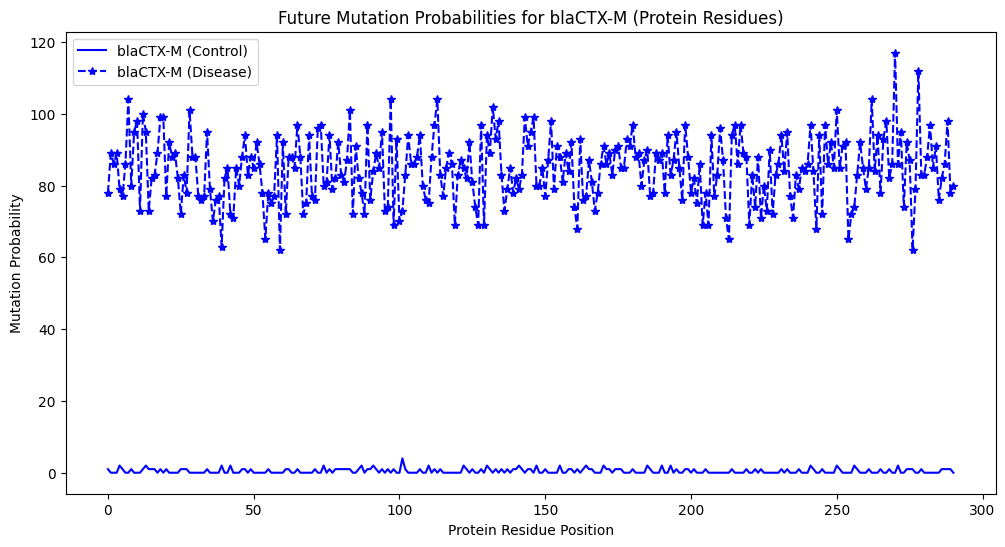

Mutation probability plot for SHV saved to 14_B_SHV.svg


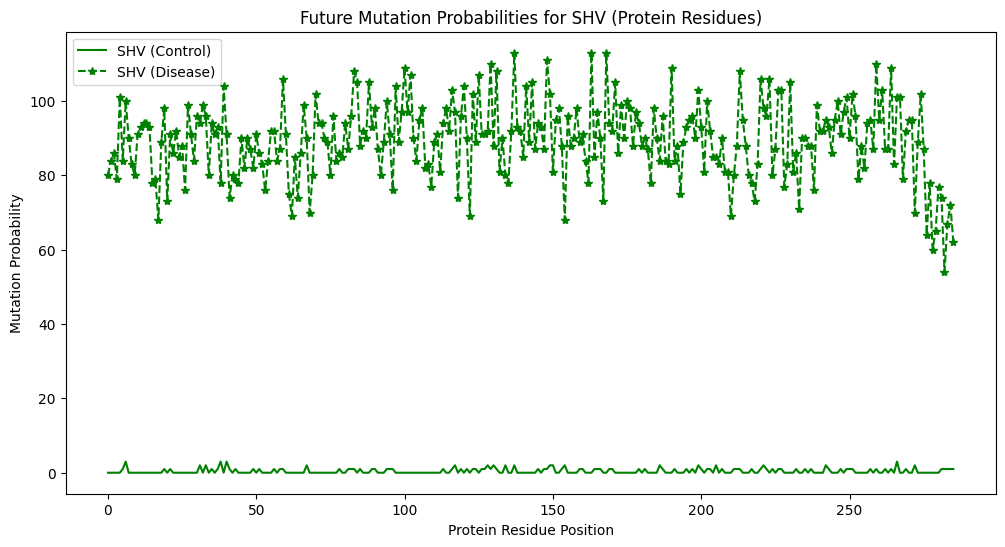

Mutation probability plot for blaTEM saved to 14_C_blaTEM.svg


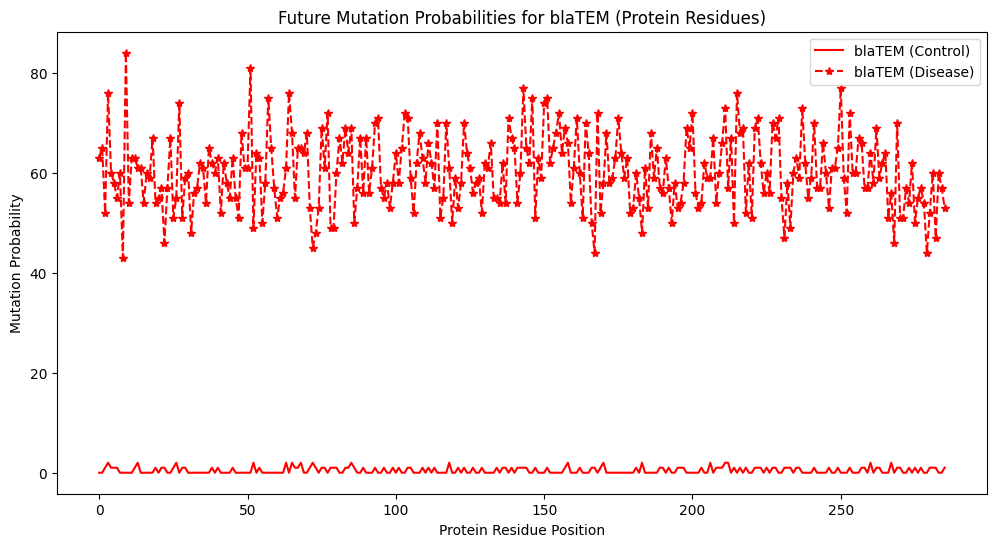


Mutation probabilities saved to 14_protein_mutation_probabilities.csv


In [13]:
def plot_protein_mutation_probabilities(df, gene_names, sequence_col='Protein', output_csv_prefix='14_protein_mutation_probabilities'):
    results = []
    colors = ['blue', 'green', 'red']  # Colors for each gene

    for idx, gene in enumerate(gene_names):
        gene_data = df[df['Gene Names'] == gene]
        
        # Control data
        control_data = gene_data[gene_data['Label'] == 0]
        control_seq = control_data[sequence_col].values[0]
        control_seq_length = len(control_seq)
        
        mutation_counts_control = np.zeros(control_seq_length)
        mutation_counts_disease = np.zeros(control_seq_length)
        
        # Simulate mutations for control
        for _ in range(5):  # Five future predictions
            future_seq = list(control_seq)
            mutation_positions = np.random.choice(control_seq_length, size=int(control_seq_length * 0.1), replace=False)
            for pos in mutation_positions:
                future_seq[pos] = np.random.choice(list('ACDEFGHIKLMNPQRSTVWY'))  # Protein amino acids
            for i, (c, f) in enumerate(zip(control_seq, future_seq)):
                if c != f:
                    mutation_counts_control[i] += 1
        
        # Simulate mutations for disease
        for _, row in gene_data[gene_data['Label'] == 1].iterrows():
            seq = row[sequence_col]
            seq = seq[:control_seq_length]  # Truncate disease sequence to match control length
            for _ in range(5):  # Five future predictions
                future_seq = list(seq)
                mutation_positions = np.random.choice(len(future_seq), size=int(len(future_seq) * 0.1), replace=False)
                for pos in mutation_positions:
                    future_seq[pos] = np.random.choice(list('ACDEFGHIKLMNPQRSTVWY'))
                for i, (d, f) in enumerate(zip(seq, future_seq)):
                    if d != f:
                        mutation_counts_disease[i] += 1
        
        # Calculate mutation probabilities (raw values)
        mutation_prob_control = mutation_counts_control
        mutation_prob_disease = mutation_counts_disease
        
        # Append results for CSV
        results.extend([
            {'Residue_Positions': i, 'Residue_Names': control_seq[i], 'Mutation_Probability': mutation_prob_control[i], 'Condition': 'Control', 'Gene': gene}
            for i in range(control_seq_length)
        ])
        results.extend([
            {'Residue_Positions': i, 'Residue_Names': control_seq[i], 'Mutation_Probability': mutation_prob_disease[i], 'Condition': 'Disease', 'Gene': gene}
            for i in range(control_seq_length)
        ])
        
        # Save plot for this gene in SVG format
        plt.figure(figsize=(12, 6))
        plt.plot(range(control_seq_length), mutation_prob_control, label=f'{gene} (Control)', color=colors[idx], linestyle='-')
        plt.plot(range(control_seq_length), mutation_prob_disease, label=f'{gene} (Disease)', color=colors[idx], linestyle='--', marker='*')
        plt.xlabel('Protein Residue Position')
        plt.ylabel('Mutation Probability')
        plt.title(f'Future Mutation Probabilities for {gene} (Protein Residues)')
        plt.legend()
        
        # Generate corrected filename format
        output_plot = f"14_{chr(65 + idx)}_{gene}.svg"
        plt.savefig(output_plot, format='svg')
        print(f"Mutation probability plot for {gene} saved to {output_plot}")
        plt.show()
    
    # Save results to CSV
    output_csv = f"{output_csv_prefix}.csv"
    results_df = pd.DataFrame(results)
    results_df.to_csv(output_csv, index=False)
    print(f"\nMutation probabilities saved to {output_csv}")

# Example Usage
gene_names = ['blaCTX-M', 'SHV', 'blaTEM']
plot_protein_mutation_probabilities(df, gene_names)

## Converting the SVGs to PNGs and TIFFs

In [20]:
pip install cairosvg

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 4.8 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 4.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cairosvg

def convert_svg_to_images(input_folder, output_png_folder, output_tiff_folder, dpi=600):
    # Ensure the output folders exist
    os.makedirs(output_png_folder, exist_ok=True)
    os.makedirs(output_tiff_folder, exist_ok=True)

    # Loop through all SVG files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".svg"):
            input_path = os.path.join(input_folder, filename)
            base_name = os.path.splitext(filename)[0]  # Extract filename without extension
            
            # Define output paths
            png_path = os.path.join(output_png_folder, f"{base_name}.png")
            tiff_path = os.path.join(output_tiff_folder, f"{base_name}.tiff")

            # Convert SVG to PNG
            cairosvg.svg2png(url=input_path, write_to=png_path, dpi=dpi)
            print(f"Converted {filename} to PNG at {dpi} DPI")

            # Convert SVG to TIFF
            cairosvg.svg2png(url=input_path, write_to=tiff_path, dpi=dpi)  # CairoSVG outputs PNG, so we save as TIFF
            print(f"Converted {filename} to TIFF at {dpi} DPI")

# Example usage
input_folder ="02_Data_Files"  # Folder containing SVGs
output_png_folder = "02_Data_Files/All-Figures_600-DPI_PNG"  # Folder for PNGs
output_tiff_folder = "02_Data_Files/All-Figures_600-DPI_TIFF"  # Folder for TIFFs

convert_svg_to_images(input_folder, output_png_folder, output_tiff_folder, dpi=600)

print("\nPNG & TIFF files in 600 DPI were exported successfully")
print("##########################################################")